In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy.stats import chi2_contingency

# EDA before doing transformations

In [4]:
print(os.getcwd())

/Users/santiagoaristizabal/Learning/python/etl_project/notebooks


In [5]:
dataset = pd.read_csv("../dataset/Accidental_Drug_Deaths_2012_2023.csv")

In [6]:
dataset.head()

date       datetype   age     sex   race ethnicity  \
0  2012-05-29T00:00:00.000  Date of death  37.0    Male  Black       NaN   
1  2012-06-27T00:00:00.000  Date of death  37.0    Male  White       NaN   
2  2014-03-24T00:00:00.000  Date of death  28.0    Male  White       NaN   
3  2014-12-31T00:00:00.000  Date of death  26.0  Female  White       NaN   
4  2016-01-16T00:00:00.000  Date of death  41.0    Male  White       NaN   

  residencecity residencecounty residencestate injurycity  ... xylazine  \
0      STAMFORD       FAIRFIELD            NaN   STAMFORD  ...      NaN   
1       NORWICH      NEW LONDON            NaN    NORWICH  ...      NaN   
2        HEBRON             NaN            NaN     HEBRON  ...      NaN   
3        BALTIC             NaN            NaN        NaN  ...      NaN   
4       SHELTON       FAIRFIELD             CT    SHELTON  ...      NaN   

  gabapentin opiatenos heroin_morph_codeine other_opioid anyopioid other  \
0        NaN       NaN                  NaN          NaN       NaN   NaN   
1        NaN       NaN                  NaN          NaN       NaN   NaN   
2        NaN       NaN                  NaN          NaN       NaN   NaN   
3        NaN       NaN                  NaN          NaN       NaN   NaN   
4        NaN       NaN                  NaN          NaN         Y   NaN   

                           residencecitygeo  \
0  \nSTAMFORD, CT \n(41.051924, -73.539475)   
1   \nNORWICH, CT \n(41.524304, -72.075821)   
2    \nHEBRON, CT \n(41.658069, -72.366324)   
3    \nBALTIC, CT \n(41.617221, -72.085031)   
4   \nSHELTON, CT \n(41.316843, -73.092968)   

                              injurycitygeo  \
0  \nSTAMFORD, CT \n(41.051924, -73.539475)   
1   \nNORWICH, CT \n(41.524304, -72.075821)   
2    \nHEBRON, CT \n(41.658069, -72.366324)   
3          \n, CT \n(41.575155, -72.738288)   
4   \nSHELTON, CT \n(41.316843, -73.092968)   

                                  deathcitygeo  
0             \n, CT \n(41.575155, -72.738288)  
1      \nNorwich, CT \n(41.524304, -72.075821)  
2  \nMarlborough, CT \n(41.632043, -72.461309)  
3       \nBaltic, CT \n(41.617221, -72.085031)  
4   \nBridgeport, CT \n(41.179195, -73.189476)  

[5 rows x 48 columns]

In [7]:
dataset.tail()

date       datetype   age     sex   race  \
11976  2023-02-28T00:00:00.000  Date of death  58.0  Female  White   
11977  2023-08-23T00:00:00.000  Date of death  23.0    Male  White   
11978  2023-01-30T00:00:00.000  Date of death  46.0    Male  White   
11979  2023-09-25T00:00:00.000  Date of death  44.0    Male  White   
11980  2023-09-16T00:00:00.000  Date of death  42.0    Male  White   

                                     ethnicity residencecity residencecounty  \
11976          No, not Spanish/Hispanic/Latino     NEW HAVEN       NEW HAVEN   
11977  Yes, Mexican, Mexican American, Chicano     NEW HAVEN       NEW HAVEN   
11978          No, not Spanish/Hispanic/Latino       DANBURY       FAIRFIELD   
11979       Yes, other Spanish/Hispanic/Latino      HARTFORD        HARTFORD   
11980          No, not Spanish/Hispanic/Latino       BRISTOL        HARTFORD   

      residencestate injurycity  ... xylazine gabapentin opiatenos  \
11976             CT  NEW HAVEN  ...      NaN        NaN       NaN   
11977             CT  NEW HAVEN  ...      NaN        NaN       NaN   
11978             CT    DANBURY  ...      NaN        NaN       NaN   
11979             CT   HARTFORD  ...        Y        NaN       NaN   
11980             CT    BRISTOL  ...        Y        NaN       NaN   

      heroin_morph_codeine other_opioid anyopioid other  \
11976                  NaN          NaN         N   NaN   
11977                  NaN          NaN         Y   NaN   
11978                  NaN          NaN         Y   NaN   
11979                  NaN          NaN         Y   NaN   
11980                  NaN          NaN         Y   NaN   

                                  residencecitygeo  \
11976  \nNEW HAVEN, CT \n(41.3082517, -72.9241605)   
11977  \nNEW HAVEN, CT \n(41.3082517, -72.9241605)   
11978      \nDANBURY, CT \n(41.393666, -73.451539)   
11979     \nHARTFORD, CT \n(41.765775, -72.673356)   
11980      \nBRISTOL, CT \n(41.673037, -72.945791)   

                                     injurycitygeo  \
11976  \nNEW HAVEN, CT \n(41.3082517, -72.9241605)   
11977  \nNEW HAVEN, CT \n(41.3082517, -72.9241605)   
11978      \nDANBURY, CT \n(41.393666, -73.451539)   
11979     \nHARTFORD, CT \n(41.765775, -72.673356)   
11980      \nBRISTOL, CT \n(41.673037, -72.945791)   

                                deathcitygeo  
11976  \n, CT \n(41.57350273, -72.738305908)  
11977  \n, CT \n(41.57350273, -72.738305908)  
11978  \n, CT \n(41.57350273, -72.738305908)  
11979  \n, CT \n(41.57350273, -72.738305908)  
11980  \n, CT \n(41.57350273, -72.738305908)  

[5 rows x 48 columns]

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  11981 non-null  object 
 1   datetype              11981 non-null  object 
 2   age                   11979 non-null  float64
 3   sex                   11972 non-null  object 
 4   race                  11923 non-null  object 
 5   ethnicity             2563 non-null   object 
 6   residencecity         11385 non-null  object 
 7   residencecounty       10721 non-null  object 
 8   residencestate        9993 non-null   object 
 9   injurycity            11801 non-null  object 
 10  injurycounty          8647 non-null   object 
 11  injurystate           8949 non-null   object 
 12  injuryplace           11622 non-null  object 
 13  descriptionofinjury   11174 non-null  object 
 14  deathcity             9200 non-null   object 
 15  deathcounty        

In [9]:
dataset.nunique()


date                    3877
datetype                   2
age                       70
sex                        4
race                      22
ethnicity                 13
residencecity            536
residencecounty          163
residencestate            35
injurycity               297
injurycounty              18
injurystate                7
injuryplace               99
descriptionofinjury      539
deathcity                238
deathcounty               10
death_state                2
location                  16
locationifother          543
cod                     7625
mannerofdeath              6
othersignifican          390
heroin                     1
heroin_dc                  1
cocaine                    1
fentanyl                   3
fentanylanalogue           1
oxycodone                  1
oxymorphone                1
ethanol                    2
hydrocodone                1
benzodiazepine             1
methadone                  1
meth_amphetamine           1
amphet        

In [10]:
(dataset.isnull().sum()/(len(dataset)))*100

date                     0.000000
datetype                 0.000000
age                      0.016693
sex                      0.075119
race                     0.484100
ethnicity               78.607796
residencecity            4.974543
residencecounty         10.516651
residencestate          16.592939
injurycity               1.502379
injurycounty            27.827393
injurystate             25.306736
injuryplace              2.996411
descriptionofinjury      6.735665
deathcity               23.211752
deathcounty             32.451381
death_state             42.609131
location                11.234455
locationifother         90.034221
cod                      0.000000
mannerofdeath            0.075119
othersignifican         89.975795
heroin                  70.136049
heroin_dc               93.823554
cocaine                 61.756114
fentanyl                32.843669
fentanylanalogue        91.862115
oxycodone               91.511560
oxymorphone             98.647859
ethanol       

## Variable with most missing values
- ethnicity               78.607796
- locationifother         90.034221
- othersignifican         89.975795
- heroin                  70.136049
- heroin_dc               93.823554
- cocaine                 61.756114
- fentanylanalogue        91.862115
- oxycodone               91.511560
- oxymorphone             98.647859
- ethanol                 73.249311
- hydrocodone             98.589433
- benzodiazepine          77.330774
- methadone               91.010767
- meth_amphetamine        98.939988
- amphet                  96.402638
- tramad                  97.479342
- hydromorphone           99.357316
- morphine_notheroin      99.507554
- xylazine                91.019114
- gabapentin              96.077122
- opiatenos               98.939988
- heroin_morph_codeine    81.620900
- other_opioid            98.147066
- other                   93.431266


In [11]:
dataset.describe().T

count       mean        std   min   25%   50%   75%   max
age  11979.0  44.005927  12.679292  13.0  34.0  44.0  54.0  87.0

In [12]:
dataset.describe(include='all').T

count unique  \
date                    11981   3877   
datetype                11981      2   
age                   11979.0    NaN   
sex                     11972      4   
race                    11923     22   
ethnicity                2563     13   
residencecity           11385    536   
residencecounty         10721    163   
residencestate           9993     35   
injurycity              11801    297   
injurycounty             8647     18   
injurystate              8949      7   
injuryplace             11622     99   
descriptionofinjury     11174    539   
deathcity                9200    238   
deathcounty              8093     10   
death_state              6876      2   
location                10635     16   
locationifother          1194    543   
cod                     11981   7625   
mannerofdeath           11972      6   
othersignifican          1201    390   
heroin                   3578      1   
heroin_dc                 740      1   
cocaine                  4582      1   
fentanyl                 8046      3   
fentanylanalogue          975      1   
oxycodone                1017      1   
oxymorphone               162      1   
ethanol                  3205      2   
hydrocodone               169      1   
benzodiazepine           2716      1   
methadone                1077      1   
meth_amphetamine          127      1   
amphet                    431      1   
tramad                    302      1   
hydromorphone              77      1   
morphine_notheroin         59      4   
xylazine                 1076      1   
gabapentin                470      2   
opiatenos                 127      1   
heroin_morph_codeine     2202      2   
other_opioid              222     18   
anyopioid                8944      2   
other                     787    153   
residencecitygeo        11814    632   
injurycitygeo           11726    493   
deathcitygeo            11980    240   

                                                                   top   freq  \
date                                           2021-05-27T00:00:00.000     12   
datetype                                                 Date of death  10213   
age                                                                NaN    NaN   
sex                                                               Male   8887   
race                                                             White  10079   
ethnicity                                                     Hispanic    972   
residencecity                                                 HARTFORD    829   
residencecounty                                              NEW HAVEN   3150   
residencestate                                                      CT   9661   
injurycity                                                    HARTFORD   1095   
injurycounty                                                 NEW HAVEN   2722   
injurystate                                                         CT   8910   
injuryplace                                                  Residence   6190   
descriptionofinjury                                    Substance Abuse   3233   
deathcity                                                     HARTFORD   1085   
deathcounty                                                   HARTFORD   2444   
death_state                                                         CT   6875   
location                                                     Residence   4800   
locationifother                                     Friend's Residence     68   
cod                                        Acute Fentanyl Intoxication    553   
mannerofdeath                                                 Accident  11942   
othersignifican                                     Recent Cocaine Use    198   
heroin                                                               Y   3578   
heroin_dc                                                            Y    740   
cocaine                               

In [13]:
cat_cols=dataset.select_dtypes(include=['object']).columns
num_cols = dataset.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['date', 'datetype', 'sex', 'race', 'ethnicity', 'residencecity',
       'residencecounty', 'residencestate', 'injurycity', 'injurycounty',
       'injurystate', 'injuryplace', 'descriptionofinjury', 'deathcity',
       'deathcounty', 'death_state', 'location', 'locationifother', 'cod',
       'mannerofdeath', 'othersignifican', 'heroin', 'heroin_dc', 'cocaine',
       'fentanyl', 'fentanylanalogue', 'oxycodone', 'oxymorphone', 'ethanol',
       'hydrocodone', 'benzodiazepine', 'methadone', 'meth_amphetamine',
       'amphet', 'tramad', 'hydromorphone', 'morphine_notheroin', 'xylazine',
       'gabapentin', 'opiatenos', 'heroin_morph_codeine', 'other_opioid',
       'anyopioid', 'other', 'residencecitygeo', 'injurycitygeo',
       'deathcitygeo'],
      dtype='object')
Numerical Variables:
['age']


age
Skew : 0.05


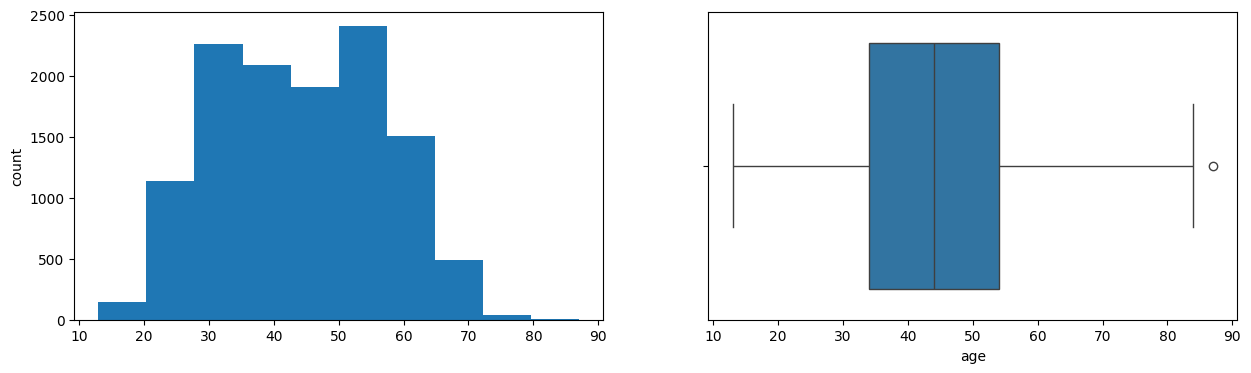

In [14]:
for col in num_cols:
    print(col)
    print('Skew :', round(dataset[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    dataset[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataset[col])
    plt.show()

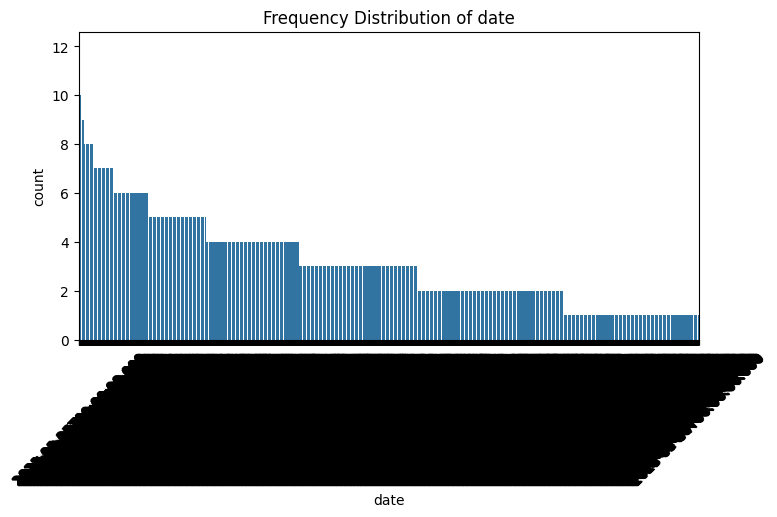

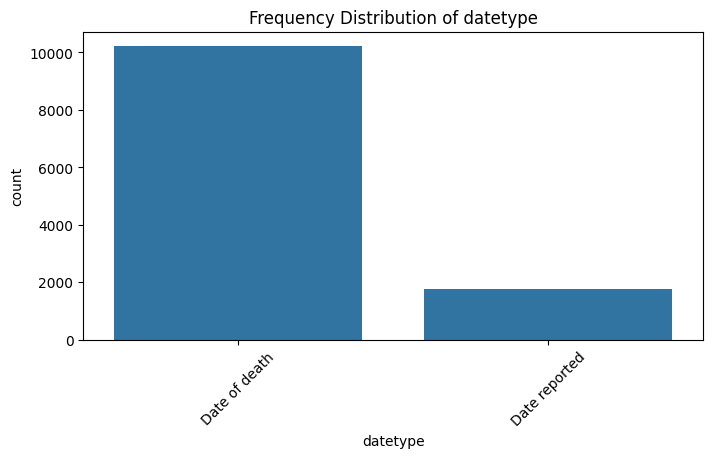

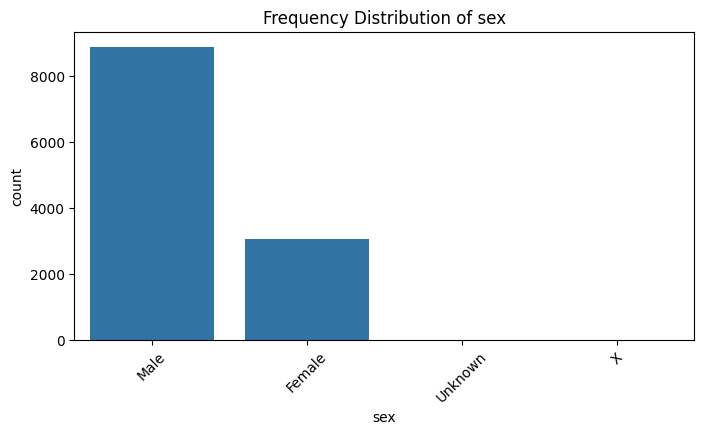

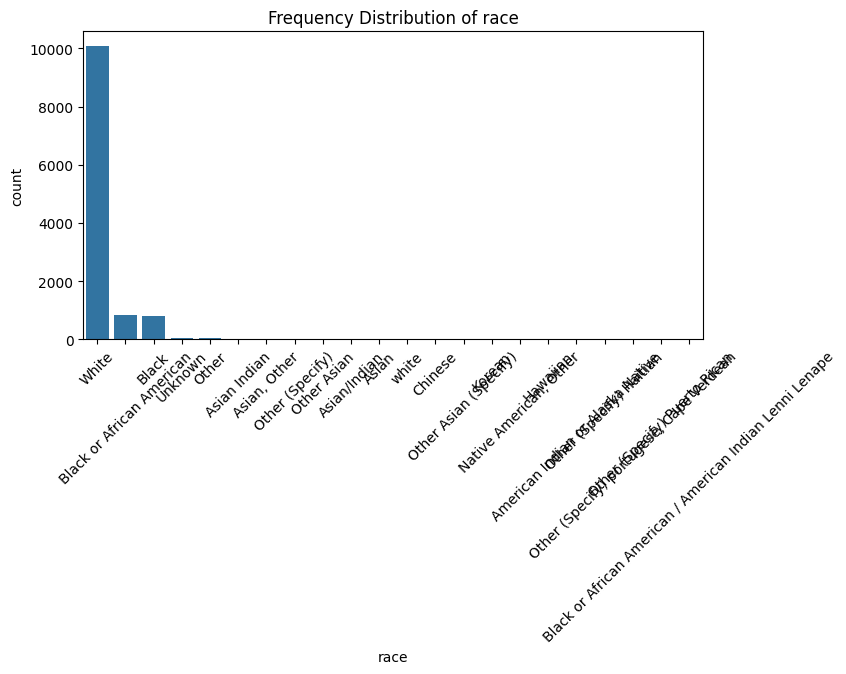

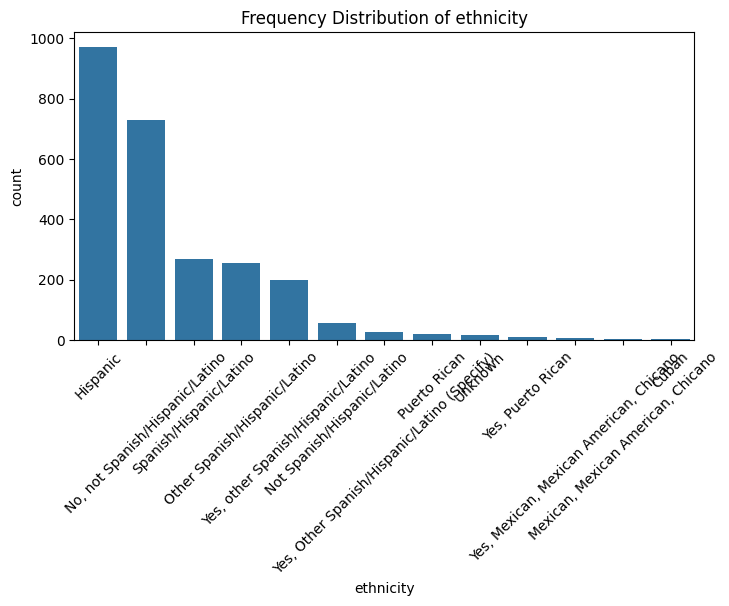

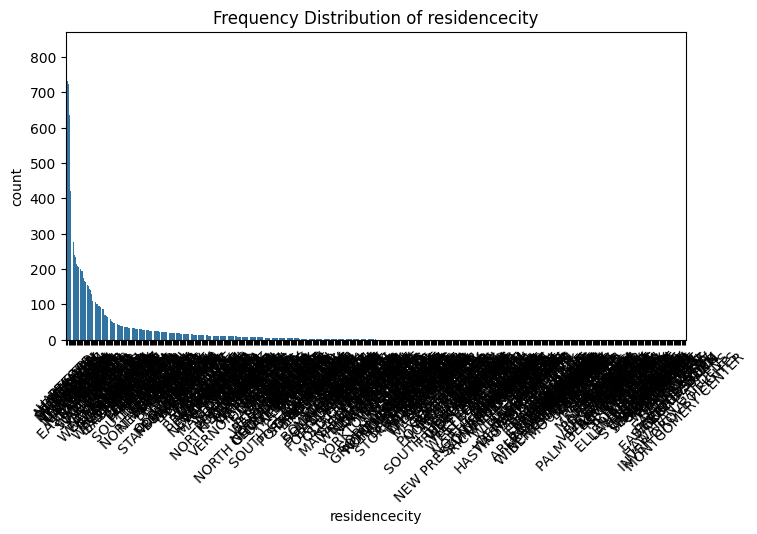

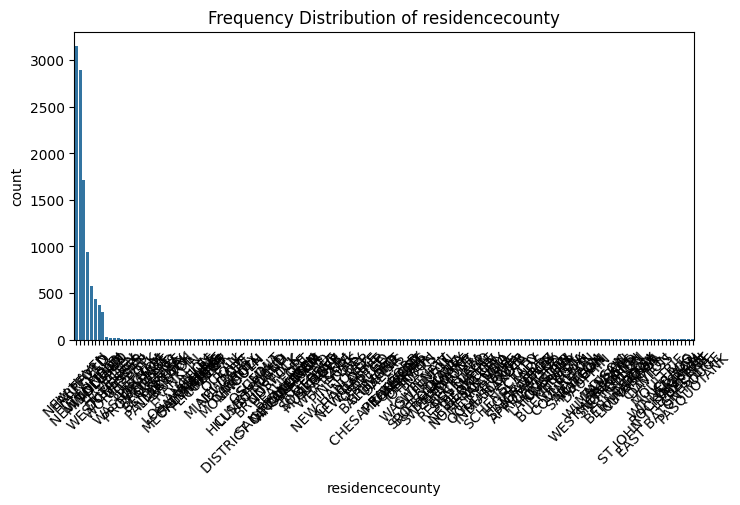

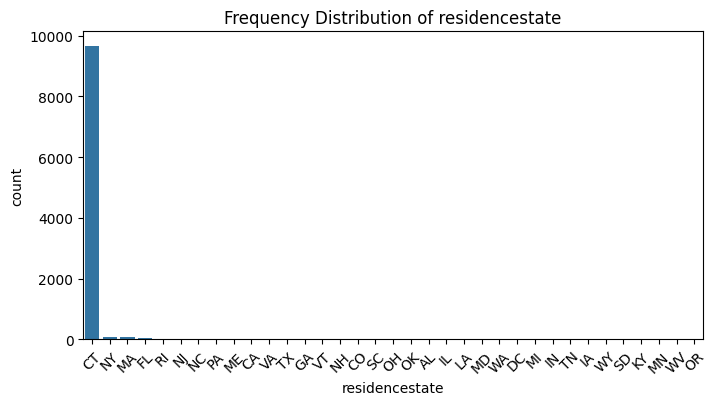

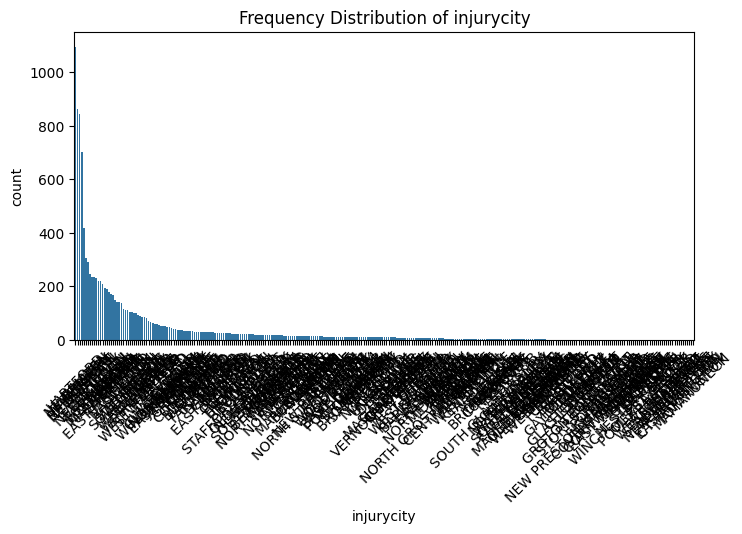

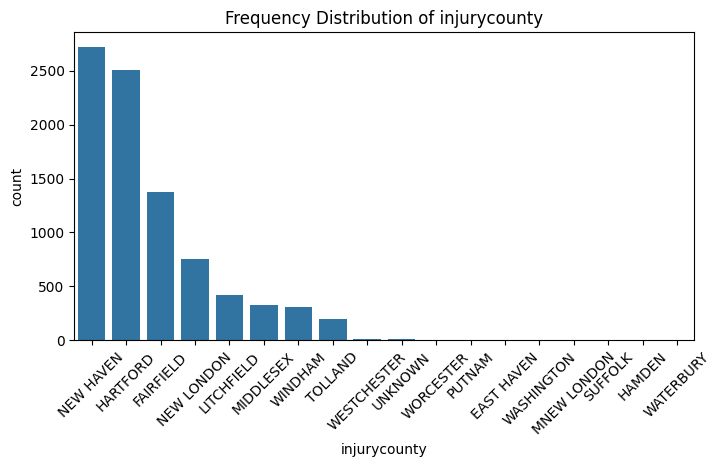

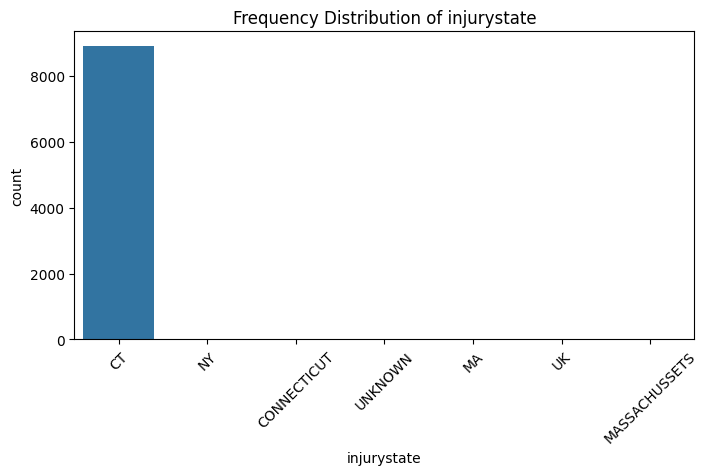

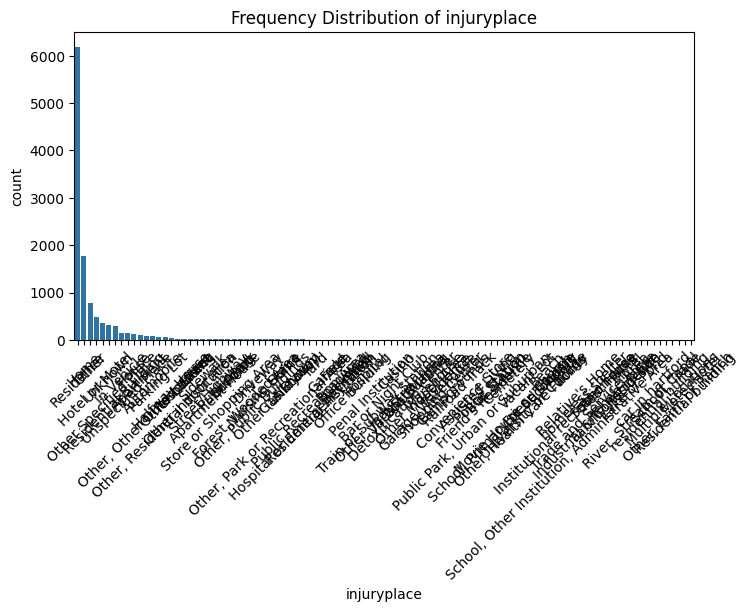

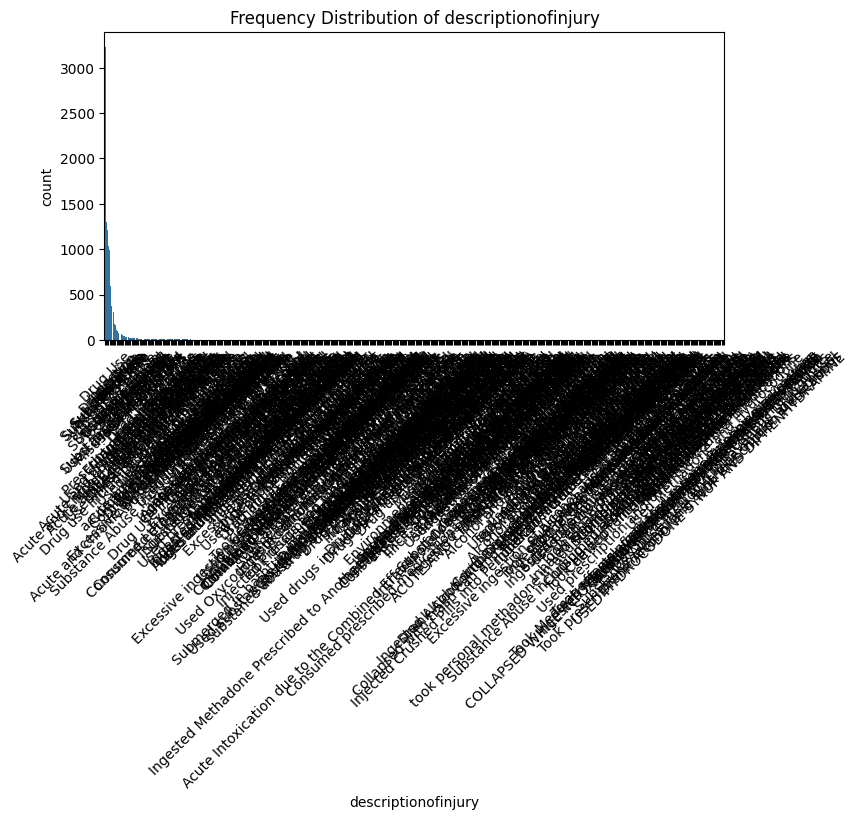

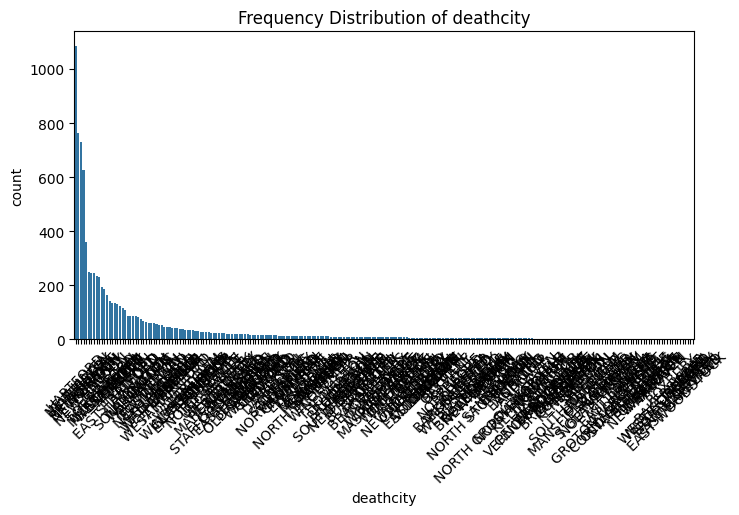

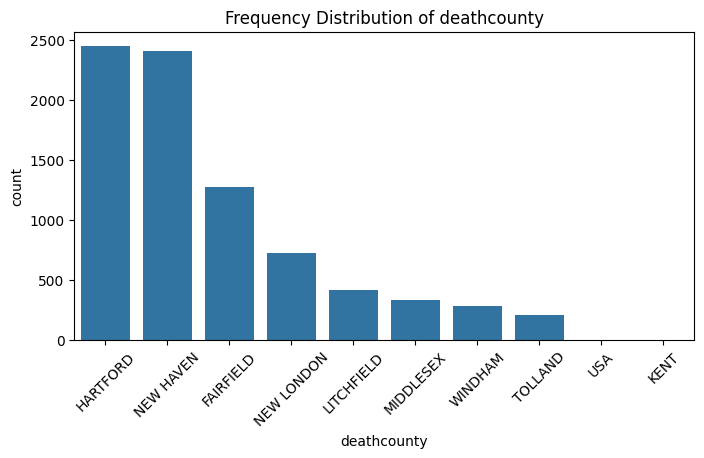

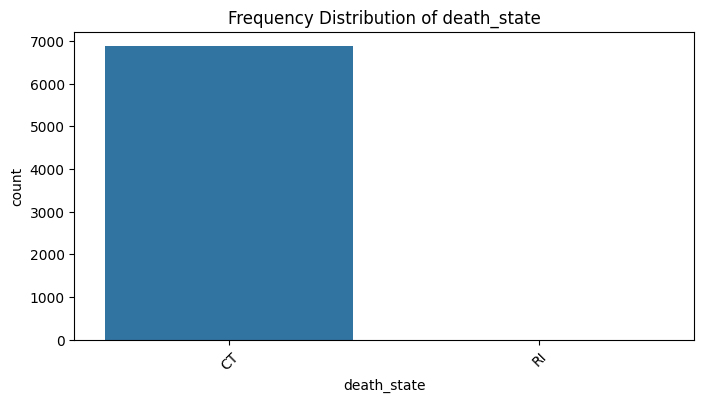

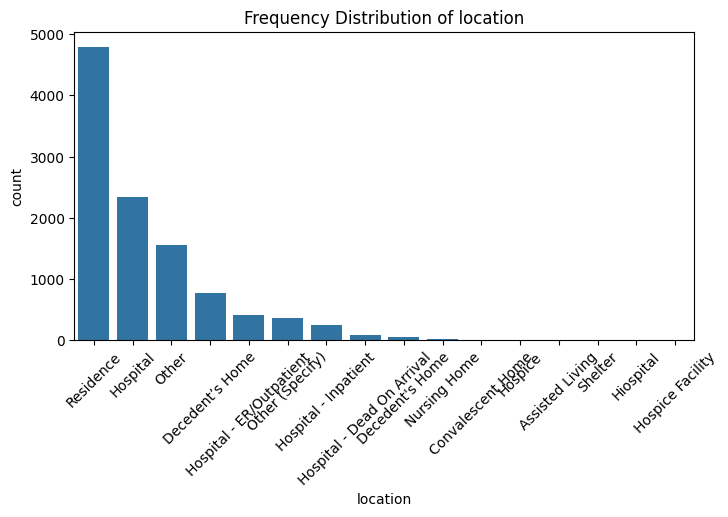

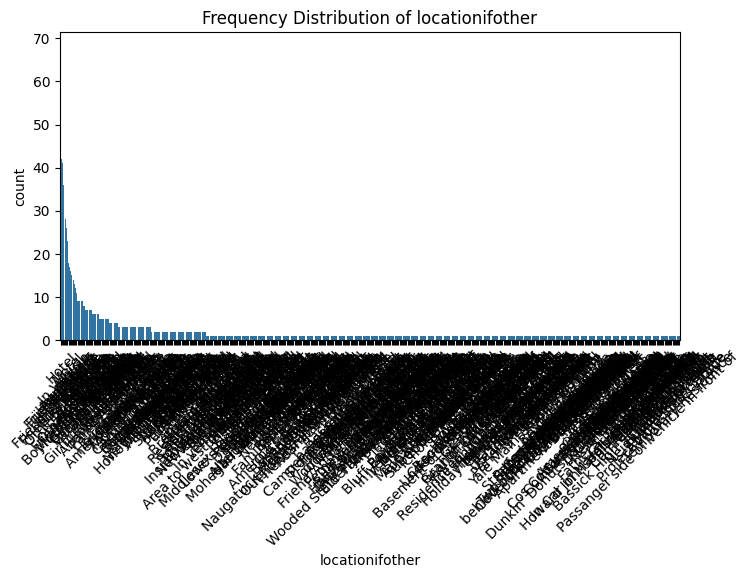

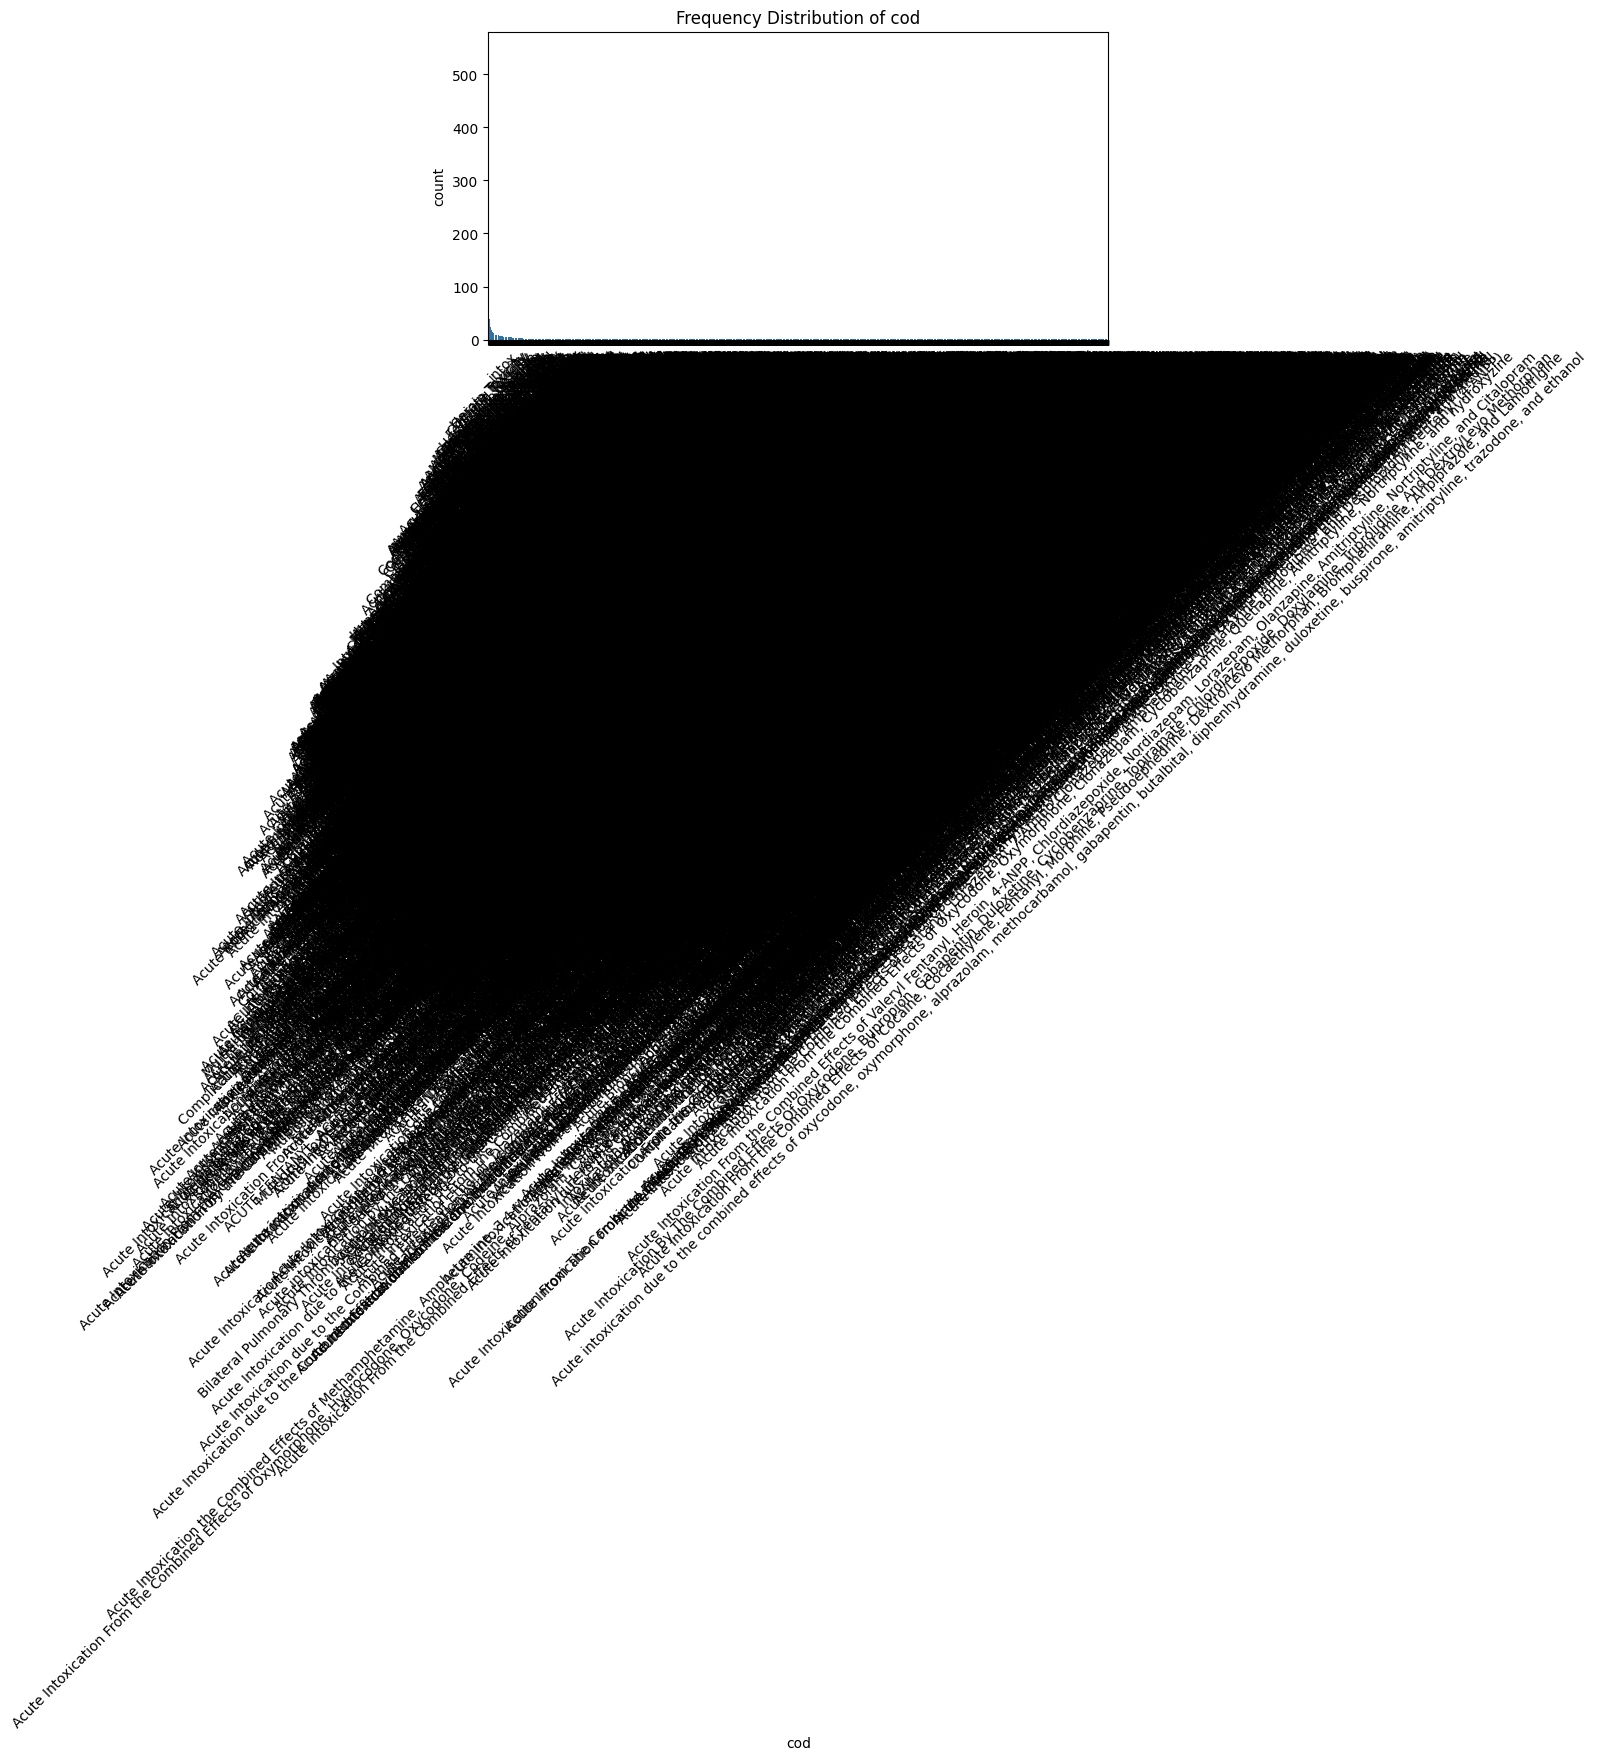

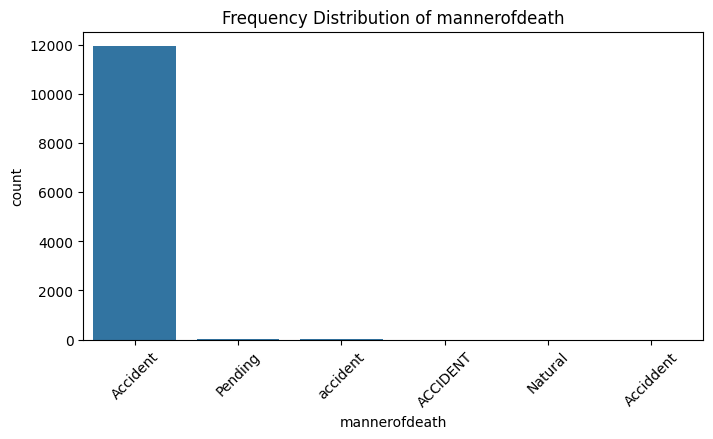

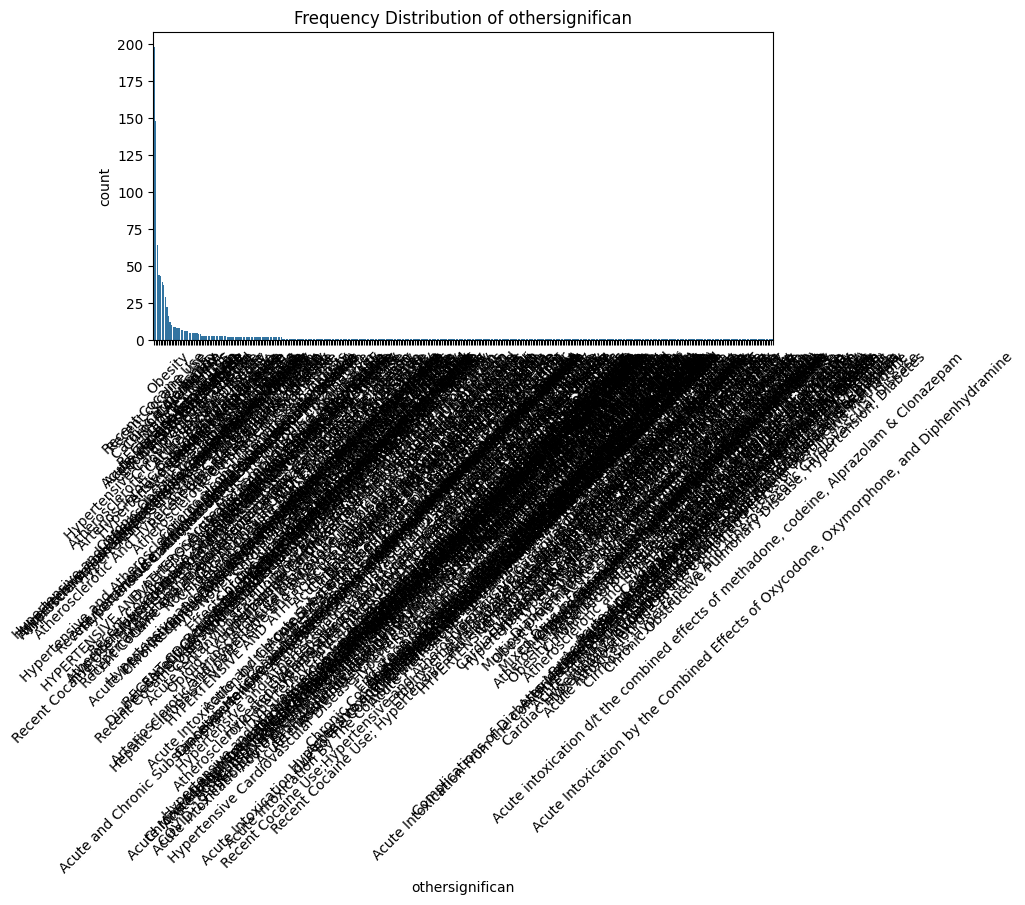

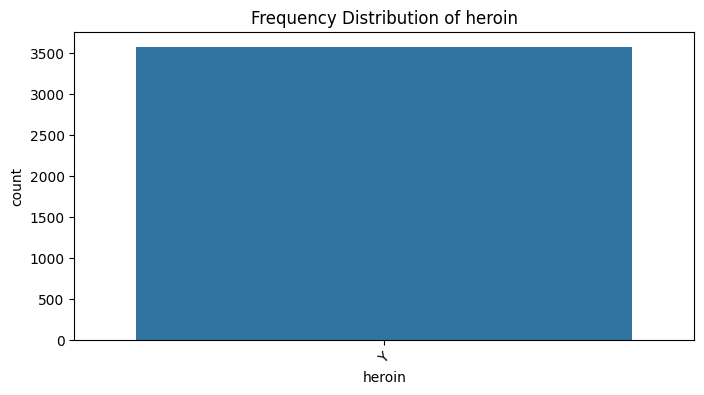

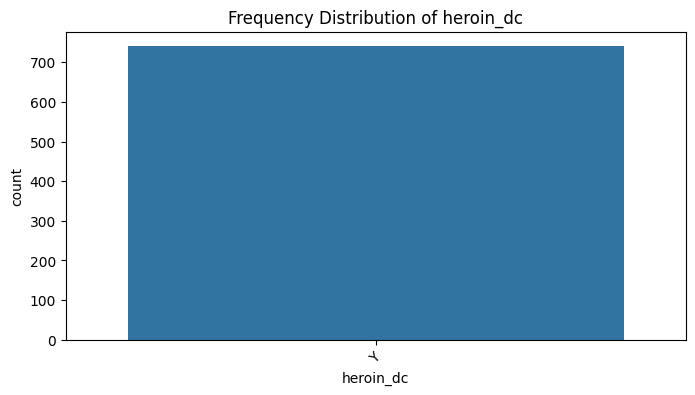

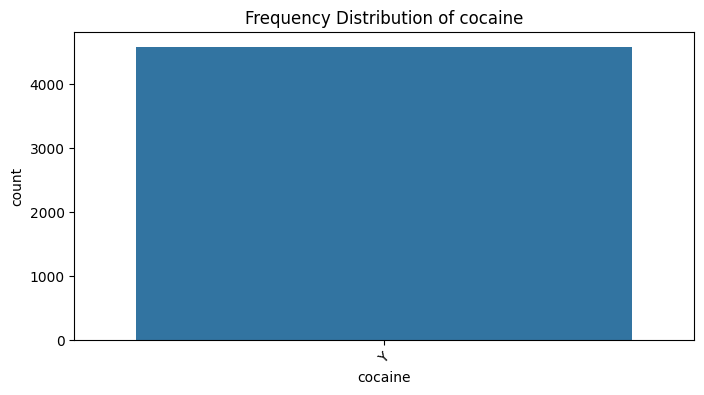

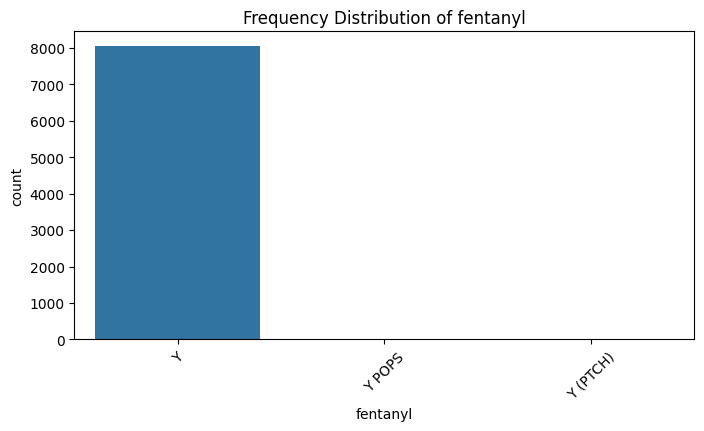

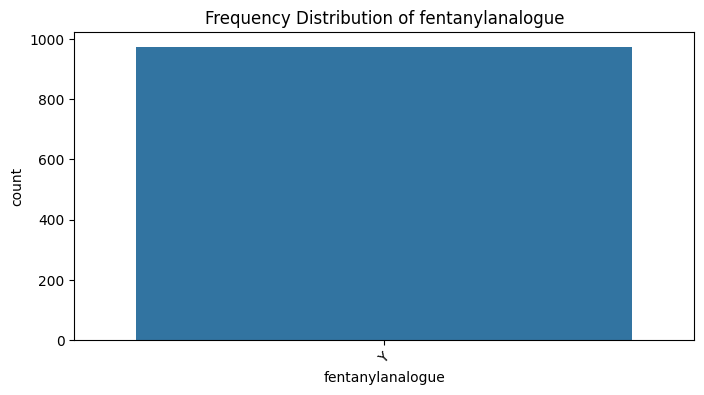

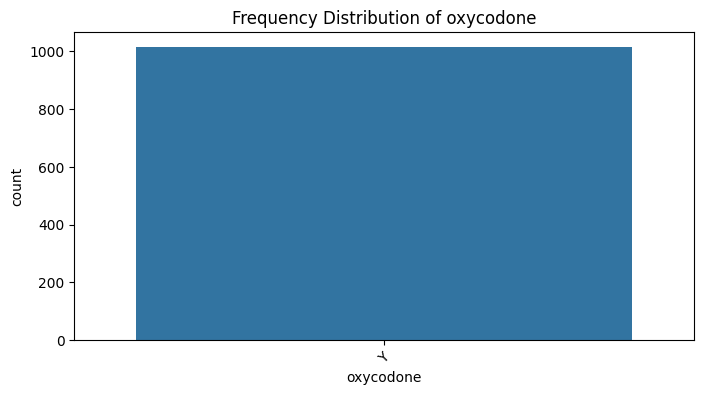

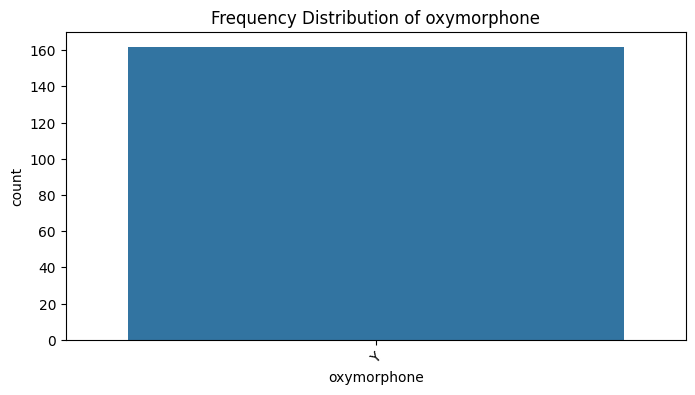

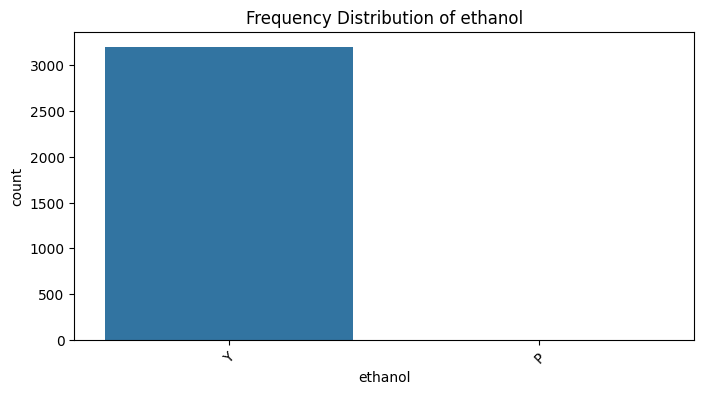

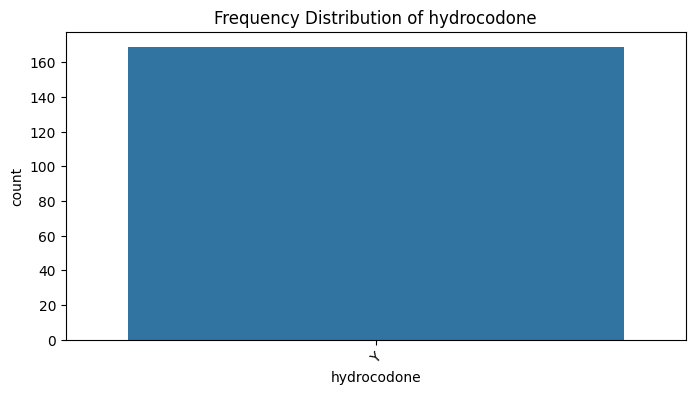

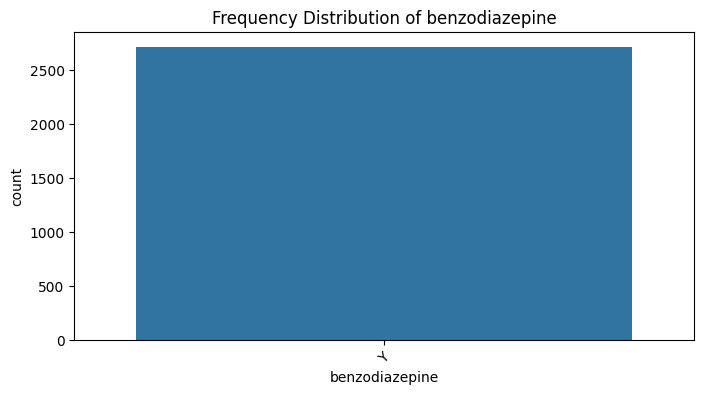

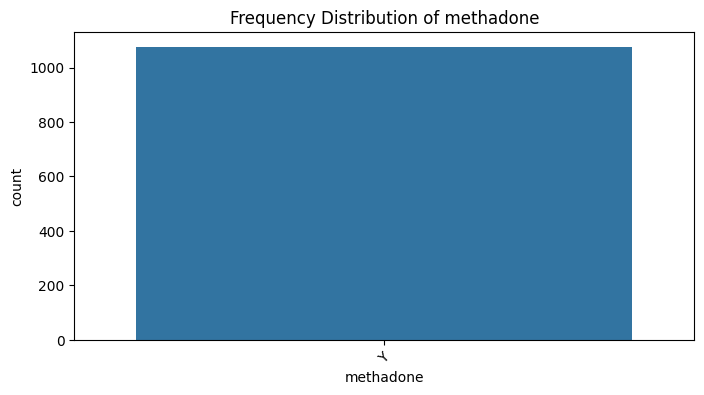

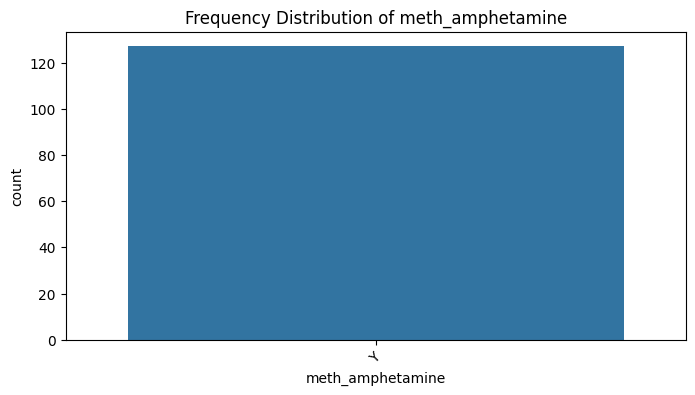

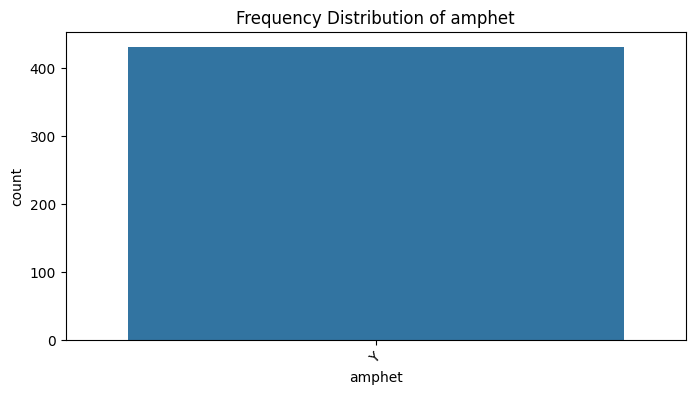

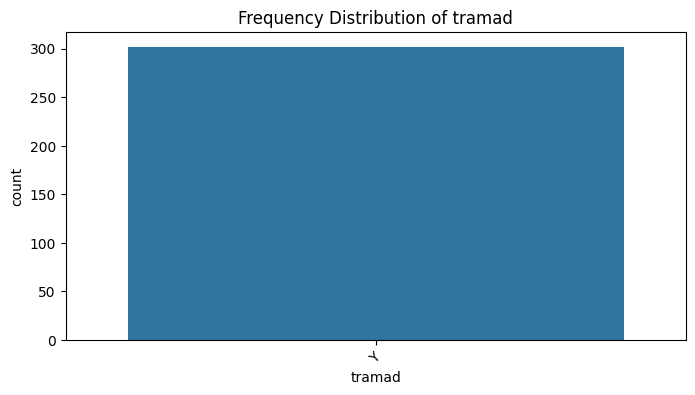

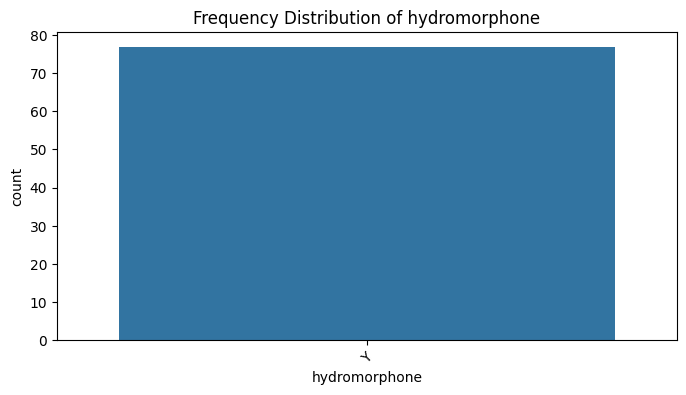

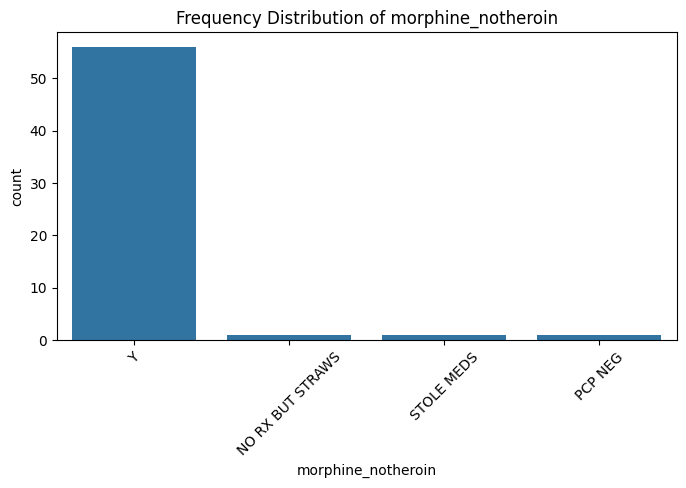

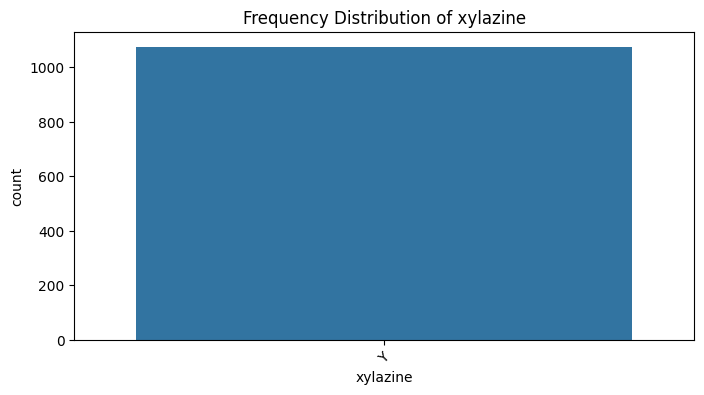

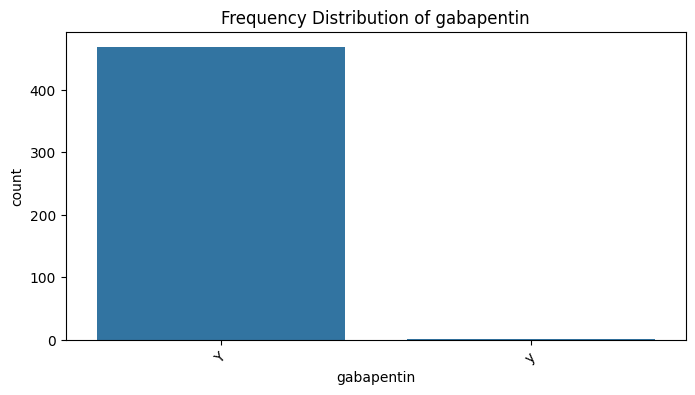

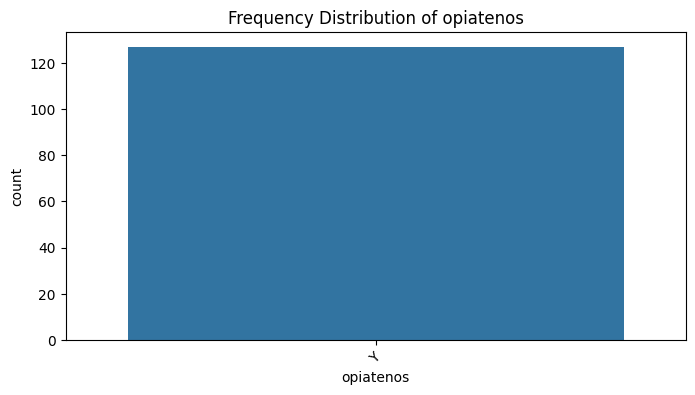

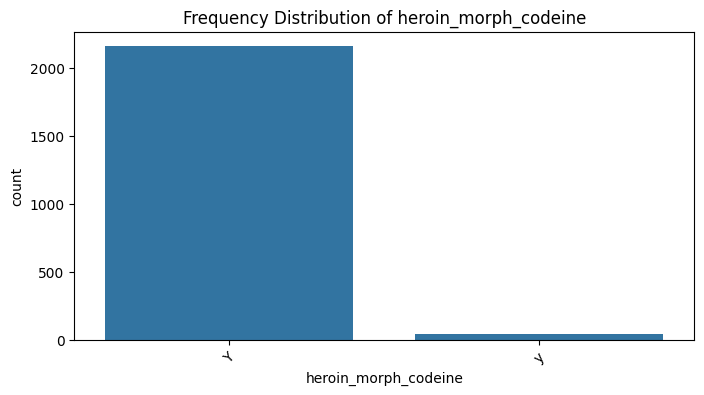

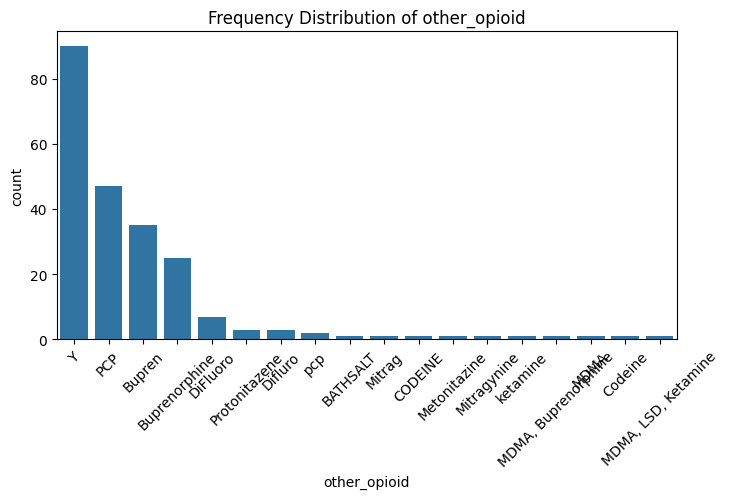

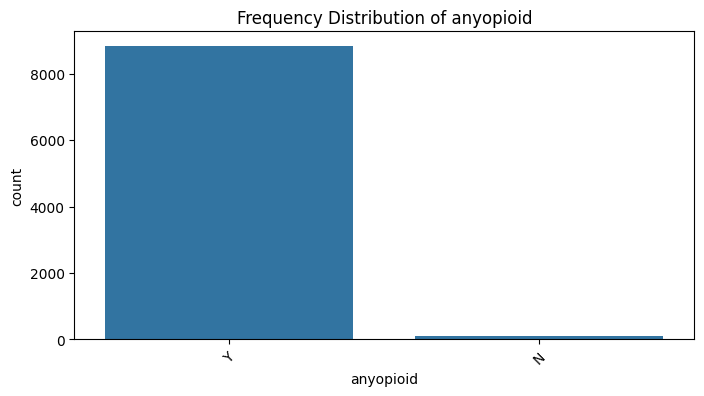

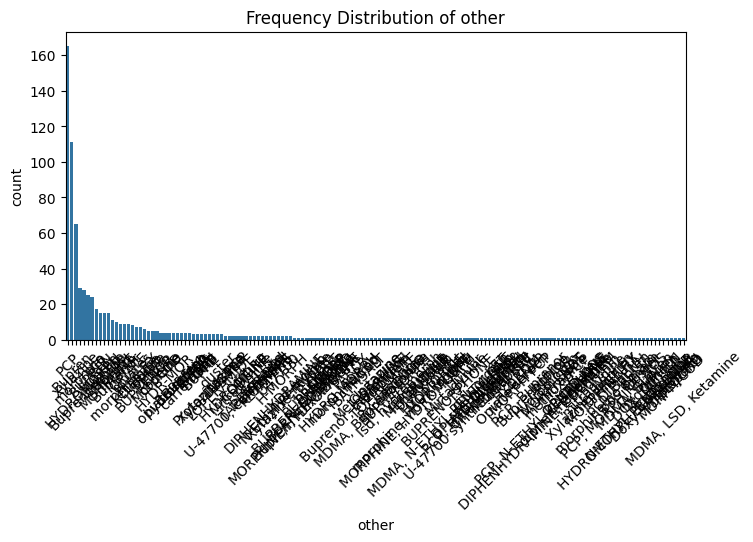

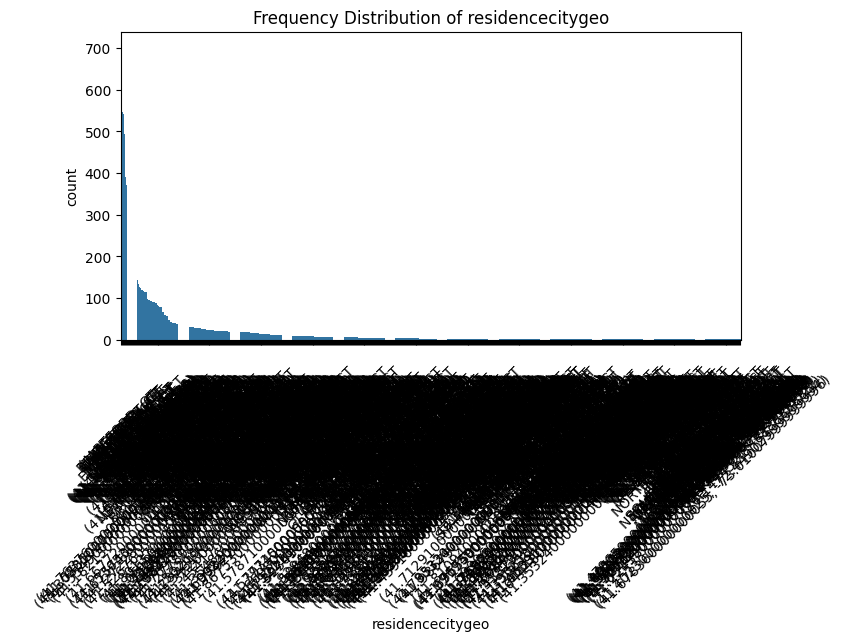

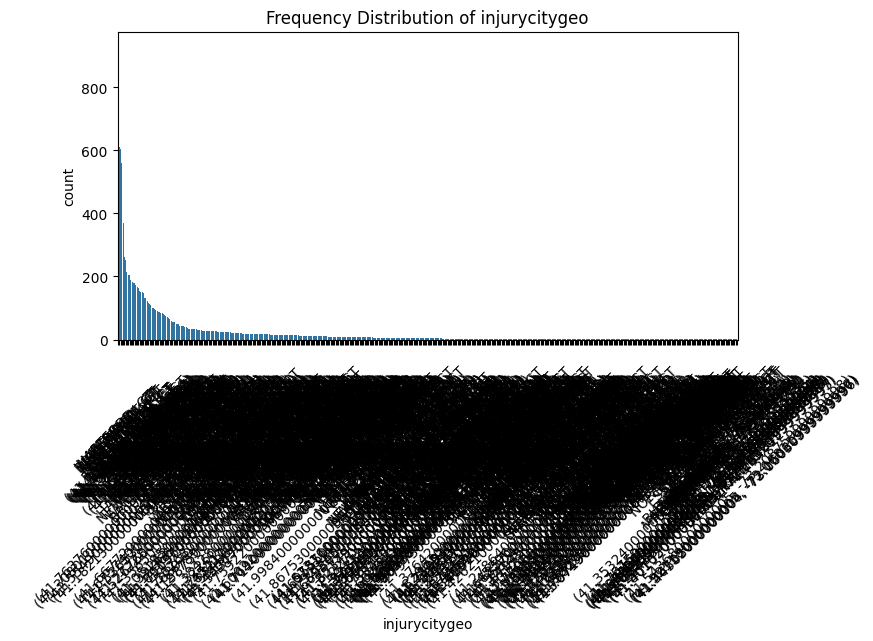

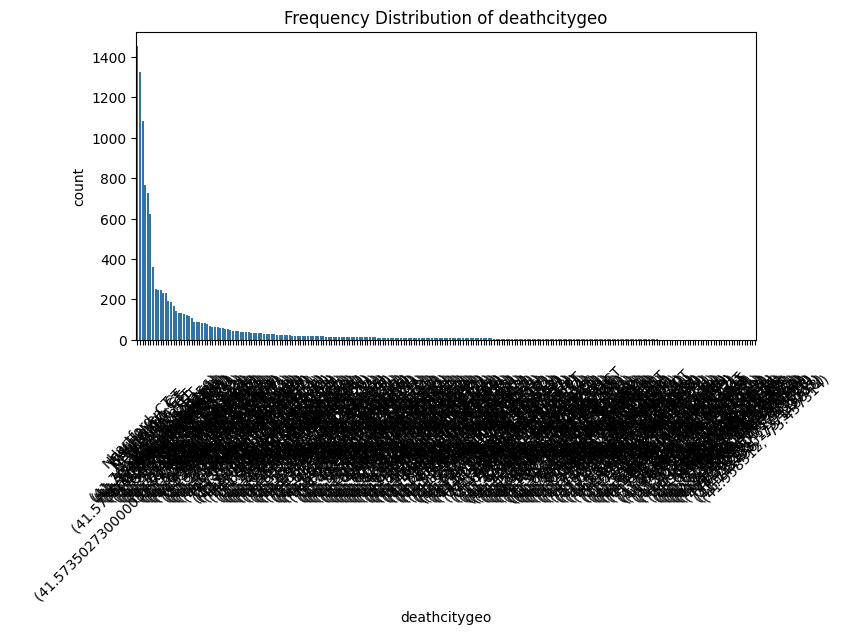

In [15]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index)
    plt.title(f'Frequency Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [16]:
for col in cat_cols:
    print(f"Proportions for {col}:")
    print(dataset[col].value_counts(normalize=True) * 100)
    print("\n")

Proportions for date:
date
2021-05-27T00:00:00.000    0.100159
2021-11-19T00:00:00.000    0.091812
2023-08-01T00:00:00.000    0.091812
2021-08-24T00:00:00.000    0.091812
2020-04-08T00:00:00.000    0.083465
                             ...   
2016-08-09T00:00:00.000    0.008347
2021-02-20T00:00:00.000    0.008347
2017-11-26T00:00:00.000    0.008347
2017-09-18T00:00:00.000    0.008347
2023-07-04T00:00:00.000    0.008347
Name: proportion, Length: 3877, dtype: float64


Proportions for datetype:
datetype
Date of death    85.243302
Date reported    14.756698
Name: proportion, dtype: float64


Proportions for sex:
sex
Male       74.231540
Female     25.743401
Unknown     0.016706
X           0.008353
Name: proportion, dtype: float64


Proportions for race:
race
White                                                       84.534094
Black or African American                                    6.927787
Black                                                        6.793592
Unknown                

Relation between the sex and the race of the people that die, the most were black and white female and men

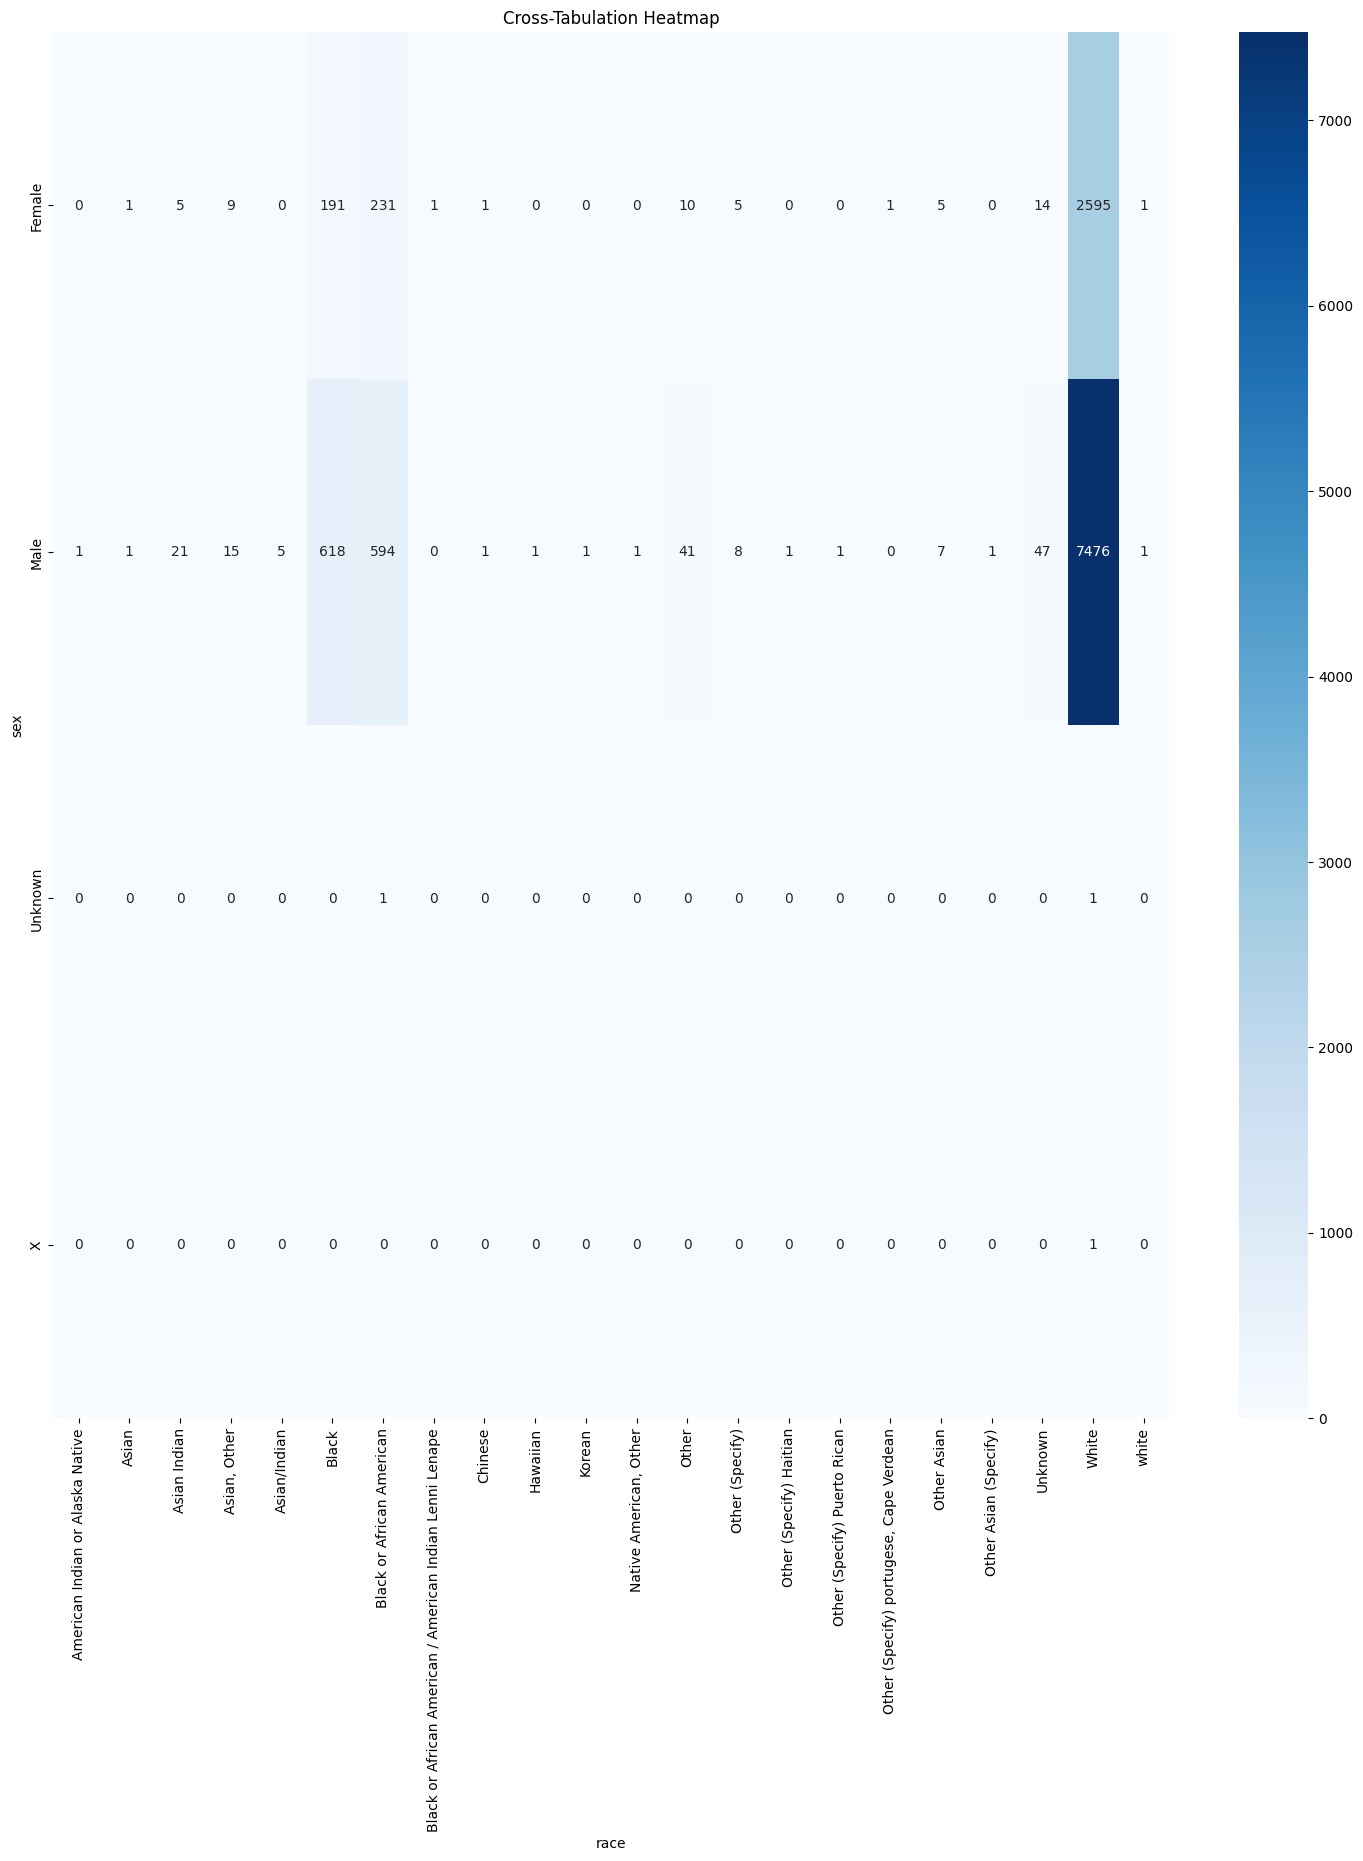

In [17]:
plt.figure(figsize=(18,18))
cross_tab = pd.crosstab(dataset['sex'], dataset['race'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross-Tabulation Heatmap')

plt.show()

In [18]:
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 28.12992321292333
P-value: 0.9999571811013225


Relation between the sex and the ethnicity, the majority are hispanic and not hispanic men

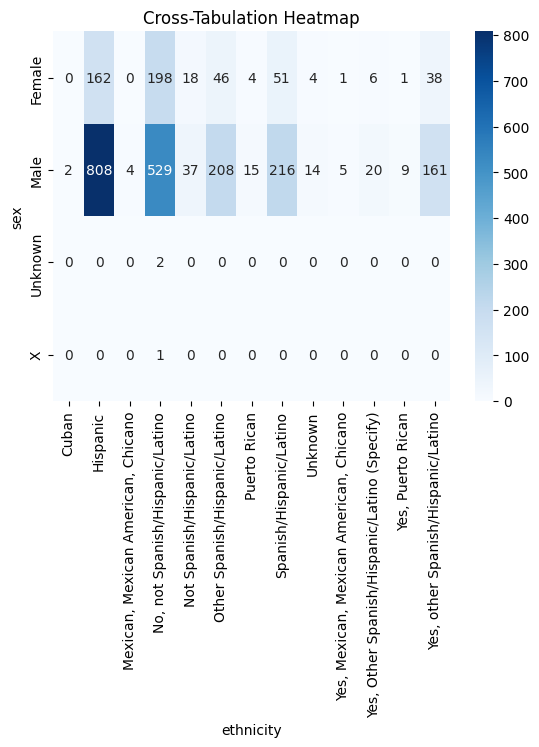

In [19]:
cross_tab = pd.crosstab(dataset['sex'], dataset['ethnicity'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross-Tabulation Heatmap')
plt.show()

In [20]:
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 44.927542386567964
P-value: 0.14615428735223815


Relation between the injury county and the place where they die, we can see that for most people died where they got injury

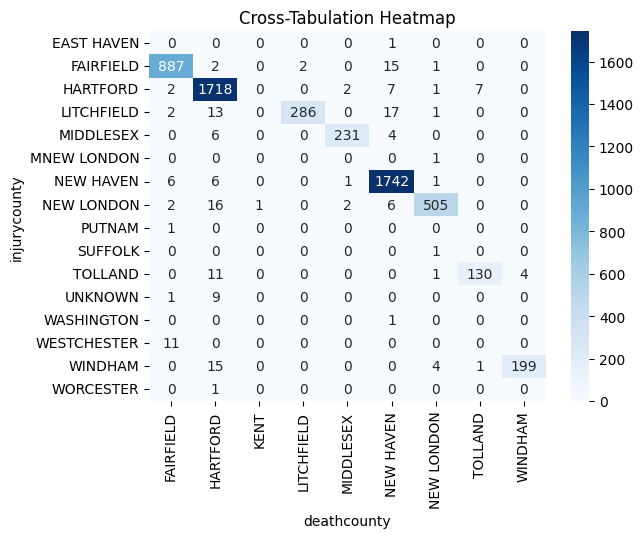

In [21]:
cross_tab = pd.crosstab(dataset['injurycounty'], dataset['deathcounty'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross-Tabulation Heatmap')
plt.show()

In [22]:
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 37518.21263856544
P-value: 0.0


Relation between the sex and the manner of death, the majority was an accident

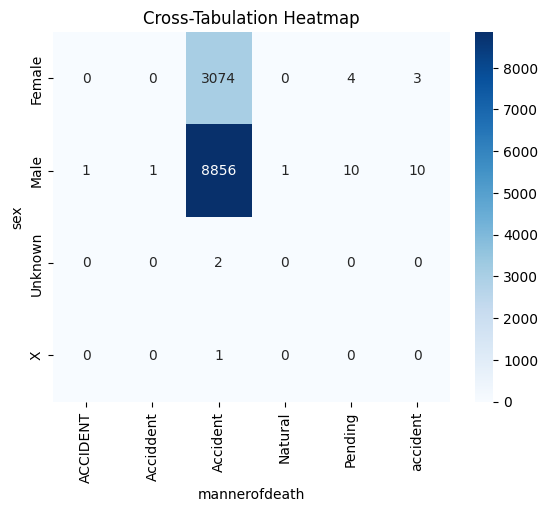

In [23]:
cross_tab = pd.crosstab(dataset['sex'], dataset['mannerofdeath'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross-Tabulation Heatmap')
plt.show()

In [24]:
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 1.1558519015330617
P-value: 0.999999298220233


# EDA after doing transformations

In [25]:
transform_df = pd.read_csv("../dataset/dataframe.csv")

In [26]:
transform_df.head()

datetype   age     sex                       race      ethnicity  \
0  Date Of Death  37.0    Male  Black or African American  Other/Unknown   
1  Date Of Death  37.0    Male                      White  Other/Unknown   
2  Date Of Death  28.0    Male                      White  Other/Unknown   
3  Date Of Death  26.0  Female                      White  Other/Unknown   
4  Date Of Death  41.0    Male                      White  Other/Unknown   

  residencecity residencecounty residencestate injurycity injurycounty  ...  \
0      Stamford       Fairfield        Unknown   Stamford      Unknown  ...   
1       Norwich      New London        Unknown    Norwich      Unknown  ...   
2        Hebron         Unknown        Unknown     Hebron      Unknown  ...   
3        Baltic         Unknown        Unknown    Unknown      Unknown  ...   
4       Shelton       Fairfield             Ct    Shelton      Unknown  ...   

  anyopioid    other                        residencecitygeo  \
0         0  Unknown  Stamford, Ct \n(41.051924, -73.539475)   
1         0  Unknown   Norwich, Ct \n(41.524304, -72.075821)   
2         0  Unknown    Hebron, Ct \n(41.658069, -72.366324)   
3         0  Unknown    Baltic, Ct \n(41.617221, -72.085031)   
4         1  Unknown   Shelton, Ct \n(41.316843, -73.092968)   

                            injurycitygeo  \
0  Stamford, Ct \n(41.051924, -73.539475)   
1   Norwich, Ct \n(41.524304, -72.075821)   
2    Hebron, Ct \n(41.658069, -72.366324)   
3          , Ct \n(41.575155, -72.738288)   
4   Shelton, Ct \n(41.316843, -73.092968)   

                                deathcitygeo  Year Month Day   date_id  \
0             , Ct \n(41.575155, -72.738288)  2012     5  29  20120529   
1      Norwich, Ct \n(41.524304, -72.075821)  2012     6  27  20120627   
2  Marlborough, Ct \n(41.632043, -72.461309)  2014     3  24  20140324   
3       Baltic, Ct \n(41.617221, -72.085031)  2014    12  31  20141231   
4   Bridgeport, Ct \n(41.179195, -73.189476)  2016     1  16  20160116   

  drug_count  
0          1  
1          1  
2          1  
3          1  
4          2  

[5 rows x 52 columns]

In [27]:
transform_df.tail()

datetype   age     sex   race                           ethnicity  \
11976  Date Of Death  58.0  Female  White              Not Hispanic or Latino   
11977  Date Of Death  23.0    Male  White  Mexican, Mexican American, Chicano   
11978  Date Of Death  46.0    Male  White              Not Hispanic or Latino   
11979  Date Of Death  44.0    Male  White                  Hispanic or Latino   
11980  Date Of Death  42.0    Male  White              Not Hispanic or Latino   

      residencecity residencecounty residencestate injurycity injurycounty  \
11976     New Haven       New Haven             Ct  New Haven    New Haven   
11977     New Haven       New Haven             Ct  New Haven    New Haven   
11978       Danbury       Fairfield             Ct    Danbury    Fairfield   
11979      Hartford        Hartford             Ct   Hartford     Hartford   
11980       Bristol        Hartford             Ct    Bristol     Hartford   

       ... anyopioid    other                           residencecitygeo  \
11976  ...         0  Unknown  New Haven, Ct \n(41.3082517, -72.9241605)   
11977  ...         1  Unknown  New Haven, Ct \n(41.3082517, -72.9241605)   
11978  ...         1  Unknown      Danbury, Ct \n(41.393666, -73.451539)   
11979  ...         1  Unknown     Hartford, Ct \n(41.765775, -72.673356)   
11980  ...         1  Unknown      Bristol, Ct \n(41.673037, -72.945791)   

                                   injurycitygeo  \
11976  New Haven, Ct \n(41.3082517, -72.9241605)   
11977  New Haven, Ct \n(41.3082517, -72.9241605)   
11978      Danbury, Ct \n(41.393666, -73.451539)   
11979     Hartford, Ct \n(41.765775, -72.673356)   
11980      Bristol, Ct \n(41.673037, -72.945791)   

                              deathcitygeo  Year Month Day   date_id  \
11976  , Ct \n(41.57350273, -72.738305908)  2023     2  28  20230228   
11977  , Ct \n(41.57350273, -72.738305908)  2023     8  23  20230823   
11978  , Ct \n(41.57350273, -72.738305908)  2023     1  30  20230130   
11979  , Ct \n(41.57350273, -72.738305908)  2023     9  25  20230925   
11980  , Ct \n(41.57350273, -72.738305908)  2023     9  16  20230916   

      drug_count  
11976          1  
11977          2  
11978          4  
11979          5  
11980          4  

[5 rows x 52 columns]

In [28]:
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetype              11981 non-null  object 
 1   age                   11979 non-null  float64
 2   sex                   11981 non-null  object 
 3   race                  11981 non-null  object 
 4   ethnicity             11981 non-null  object 
 5   residencecity         11981 non-null  object 
 6   residencecounty       11981 non-null  object 
 7   residencestate        11981 non-null  object 
 8   injurycity            11981 non-null  object 
 9   injurycounty          11981 non-null  object 
 10  injurystate           11981 non-null  object 
 11  injuryplace           11981 non-null  object 
 12  descriptionofinjury   11981 non-null  object 
 13  deathcity             11981 non-null  object 
 14  deathcounty           11981 non-null  object 
 15  death_state        

In [29]:
transform_df.nunique()

datetype                   2
age                       70
sex                        4
race                       8
ethnicity                  6
residencecity            536
residencecounty          164
residencestate            36
injurycity               297
injurycounty              14
injurystate                5
injuryplace               94
descriptionofinjury      428
deathcity                239
deathcounty               11
death_state                3
location                   8
locationifother          483
cod                     7064
mannerofdeath              4
othersignifican          350
heroin                     2
heroin_dc                  2
cocaine                    2
fentanyl                   2
fentanylanalogue           2
oxycodone                  2
oxymorphone                2
ethanol                    2
hydrocodone                2
benzodiazepine             2
methadone                  2
meth_amphetamine           2
amphet                     2
tramad        

In [30]:
(transform_df.isnull().sum()/(len(transform_df)))*100

datetype                0.000000
age                     0.016693
sex                     0.000000
race                    0.000000
ethnicity               0.000000
residencecity           0.000000
residencecounty         0.000000
residencestate          0.000000
injurycity              0.000000
injurycounty            0.000000
injurystate             0.000000
injuryplace             0.000000
descriptionofinjury     0.000000
deathcity               0.000000
deathcounty             0.000000
death_state             0.000000
location                0.000000
locationifother         0.000000
cod                     0.000000
mannerofdeath           0.000000
othersignifican         0.000000
heroin                  0.000000
heroin_dc               0.000000
cocaine                 0.000000
fentanyl                0.000000
fentanylanalogue        0.000000
oxycodone               0.000000
oxymorphone             0.000000
ethanol                 0.000000
hydrocodone             0.000000
benzodiaze

In [31]:
transform_df.describe().T

count          mean           std         min  \
age                   11979.0  4.400593e+01     12.679292        13.0   
heroin                11981.0  2.986395e-01      0.457680         0.0   
heroin_dc             11981.0  6.176446e-02      0.240737         0.0   
cocaine               11981.0  3.824389e-01      0.486003         0.0   
fentanyl              11981.0  6.713964e-01      0.469725         0.0   
fentanylanalogue      11981.0  8.137885e-02      0.273427         0.0   
oxycodone             11981.0  8.488440e-02      0.278721         0.0   
oxymorphone           11981.0  1.352141e-02      0.115498         0.0   
ethanol               11981.0  2.674234e-01      0.442634         0.0   
hydrocodone           11981.0  1.410567e-02      0.117932         0.0   
benzodiazepine        11981.0  2.266923e-01      0.418709         0.0   
methadone             11981.0  8.989233e-02      0.286039         0.0   
meth_amphetamine      11981.0  1.060012e-02      0.102414         0.0   
amphet                11981.0  3.597362e-02      0.186232         0.0   
tramad                11981.0  2.520658e-02      0.156759         0.0   
hydromorphone         11981.0  6.426843e-03      0.079913         0.0   
morphine_notheroin    11981.0  4.674067e-03      0.068210         0.0   
xylazine              11981.0  8.980886e-02      0.285920         0.0   
gabapentin            11981.0  3.914531e-02      0.193949         0.0   
opiatenos             11981.0  1.060012e-02      0.102414         0.0   
heroin_morph_codeine  11981.0  1.800351e-01      0.384233         0.0   
other_opioid          11981.0  7.511894e-03      0.086349         0.0   
anyopioid             11981.0  7.365829e-01      0.440505         0.0   
Year                  11981.0  2.018758e+03      3.099646      2012.0   
Month                 11981.0  6.601285e+00      3.412052         1.0   
Day                   11981.0  1.531007e+01      8.920232         1.0   
date_id               11981.0  2.018826e+07  30988.204957  20120101.0   
drug_count            11981.0  3.338703e+00      1.521618         0.0   

                             25%         50%         75%         max  
age                         34.0        44.0        54.0        87.0  
heroin                       0.0         0.0         1.0         1.0  
heroin_dc                    0.0         0.0         0.0         1.0  
cocaine                      0.0         0.0         1.0         1.0  
fentanyl                     0.0         1.0         1.0         1.0  
fentanylanalogue             0.0         0.0         0.0         1.0  
oxycodone                    0.0         0.0         0.0         1.0  
oxymorphone                  0.0         0.0         0.0         1.0  
ethanol                      0.0         0.0         1.0         1.0  
hydrocodone                  0.0         0.0         0.0         1.0  
benzodiazepine               0.0         0.0         0.0         1.0  
methadone                    0.0         0.0         0.0         1.0  
meth_amphetamine             0.0         0.0         0.0         1.0  
amphet                       0.0         0.0         0.0         1.0  
tramad                       0.0         0.0         0.0         1.0  
hydromorphone                0.0         0.0         0.0         1.0  
morphine_notheroin           0.0         0.0         0.0         1.0  
xylazine                     0.0         0.0         0.0         1.0  
gabapentin                   0.0         0.0         0.0         1.0  
opiatenos                    0.0         0.0         0.0         1.0  
heroin_morph_codeine         0.0         0.0         0.0         1.0  
other_opioid                 0.0         0.0         0.0         1.0  
anyopioid                    0.0         1.0         1.0         1.0  
Year                      2016.0      2019.0      2021.0      2023.0  
Month                        4.0         7.0        10.0        12.0  
Day                          7.0        15.0        23.0    

In [32]:
transform_df.describe(include='all').T

count unique  \
datetype                11981      2   
age                   11979.0    NaN   
sex                     11981      4   
race                    11981      8   
ethnicity               11981      6   
residencecity           11981    536   
residencecounty         11981    164   
residencestate          11981     36   
injurycity              11981    297   
injurycounty            11981     14   
injurystate             11981      5   
injuryplace             11981     94   
descriptionofinjury     11981    428   
deathcity               11981    239   
deathcounty             11981     11   
death_state             11981      3   
location                11981      8   
locationifother         11981    483   
cod                     11981   7064   
mannerofdeath           11981      4   
othersignifican         11981    350   
heroin                11981.0    NaN   
heroin_dc             11981.0    NaN   
cocaine               11981.0    NaN   
fentanyl              11981.0    NaN   
fentanylanalogue      11981.0    NaN   
oxycodone             11981.0    NaN   
oxymorphone           11981.0    NaN   
ethanol               11981.0    NaN   
hydrocodone           11981.0    NaN   
benzodiazepine        11981.0    NaN   
methadone             11981.0    NaN   
meth_amphetamine      11981.0    NaN   
amphet                11981.0    NaN   
tramad                11981.0    NaN   
hydromorphone         11981.0    NaN   
morphine_notheroin    11981.0    NaN   
xylazine              11981.0    NaN   
gabapentin            11981.0    NaN   
opiatenos             11981.0    NaN   
heroin_morph_codeine  11981.0    NaN   
other_opioid          11981.0    NaN   
anyopioid             11981.0    NaN   
other                   11981    122   
residencecitygeo        11981    633   
injurycitygeo           11981    494   
deathcitygeo            11981    241   
Year                  11981.0    NaN   
Month                 11981.0    NaN   
Day                   11981.0    NaN   
date_id               11981.0    NaN   
drug_count            11981.0    NaN   

                                                                 top   freq  \
datetype                                               Date Of Death  10213   
age                                                              NaN    NaN   
sex                                                             Male   8887   
race                                                           White  10081   
ethnicity                                              Other/Unknown   9690   
residencecity                                               Hartford    829   
residencecounty                                            New Haven   3150   
residencestate                                                    Ct   9661   
injurycity                                                  Hartford   1095   
injurycounty                                                 Unknown   3345   
injurystate                                                       CT   8917   
injuryplace                                                Residence   6193   
descriptionofinjury                                  Substance Abuse   4828   
deathcity                                                    Unknown   2781   
deathcounty                                                  Unknown   3888   
death_state                                                       Ct   6875   
location                                                   Residence   5628   
locationifother                                              Unknown  10788   
cod                                      Acute Fentanyl Intoxication    632   
mannerofdeath                                               Accident  11957   
othersignifican                                              Unknown  10780   
heroin                                                           NaN    NaN   
heroin_dc                                                        NaN    NaN   
cocaine

In [33]:
cat_cols=transform_df.select_dtypes(include=['object']).columns
num_cols = transform_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['datetype', 'sex', 'race', 'ethnicity', 'residencecity',
       'residencecounty', 'residencestate', 'injurycity', 'injurycounty',
       'injurystate', 'injuryplace', 'descriptionofinjury', 'deathcity',
       'deathcounty', 'death_state', 'location', 'locationifother', 'cod',
       'mannerofdeath', 'othersignifican', 'other', 'residencecitygeo',
       'injurycitygeo', 'deathcitygeo'],
      dtype='object')
Numerical Variables:
['age', 'heroin', 'heroin_dc', 'cocaine', 'fentanyl', 'fentanylanalogue', 'oxycodone', 'oxymorphone', 'ethanol', 'hydrocodone', 'benzodiazepine', 'methadone', 'meth_amphetamine', 'amphet', 'tramad', 'hydromorphone', 'morphine_notheroin', 'xylazine', 'gabapentin', 'opiatenos', 'heroin_morph_codeine', 'other_opioid', 'anyopioid', 'Year', 'Month', 'Day', 'date_id', 'drug_count']


age
Skew : 0.05


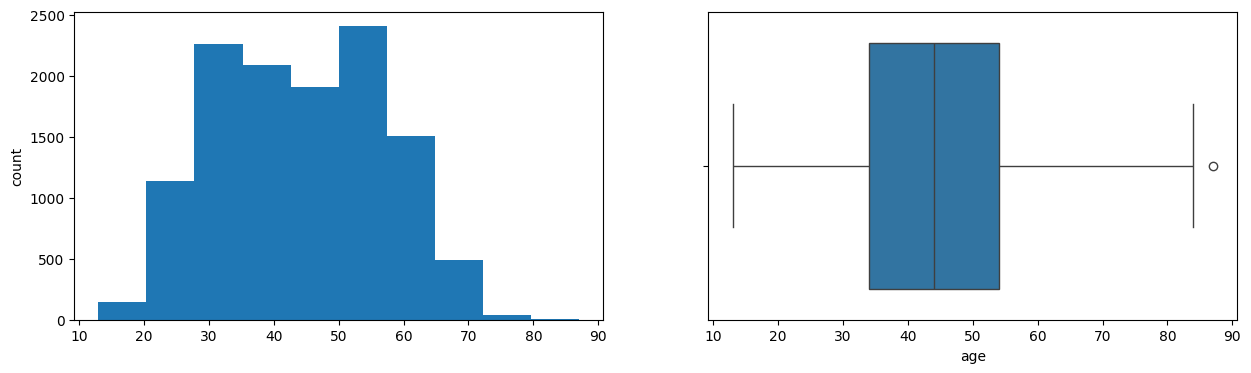

heroin
Skew : 0.88


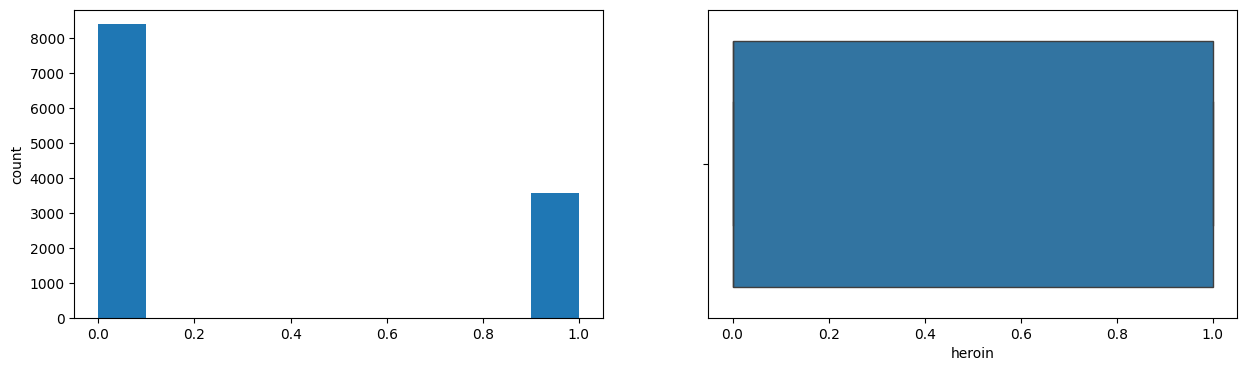

heroin_dc
Skew : 3.64


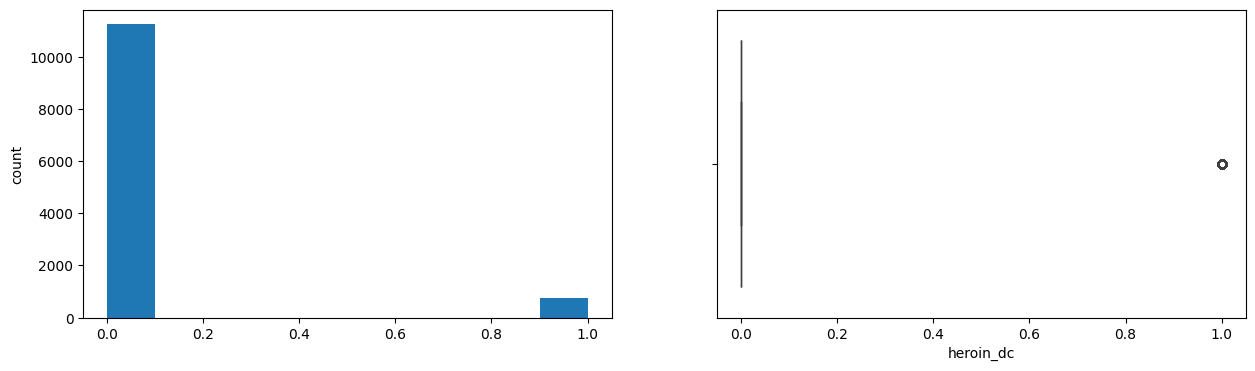

cocaine
Skew : 0.48


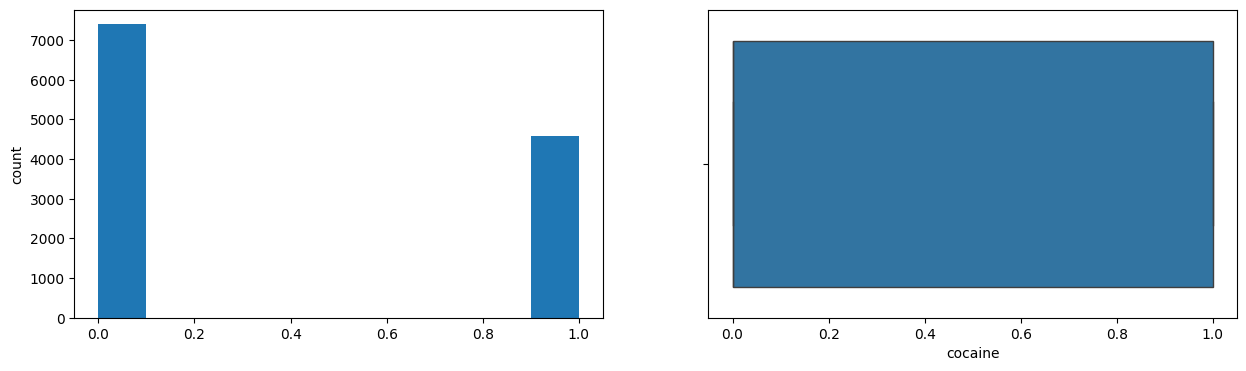

fentanyl
Skew : -0.73


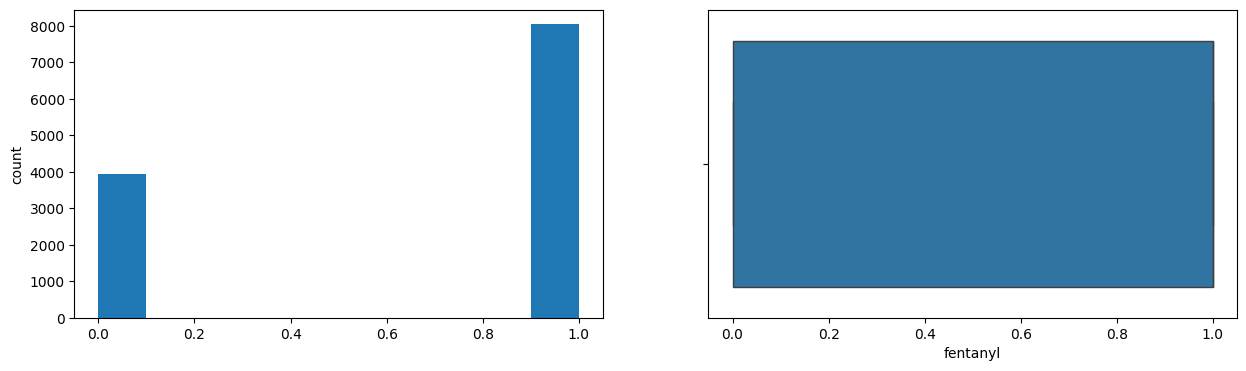

fentanylanalogue
Skew : 3.06


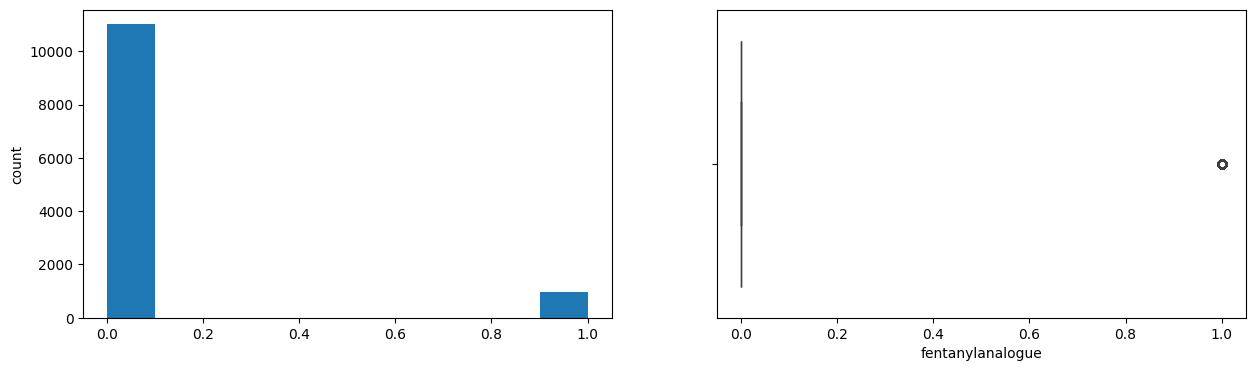

oxycodone
Skew : 2.98


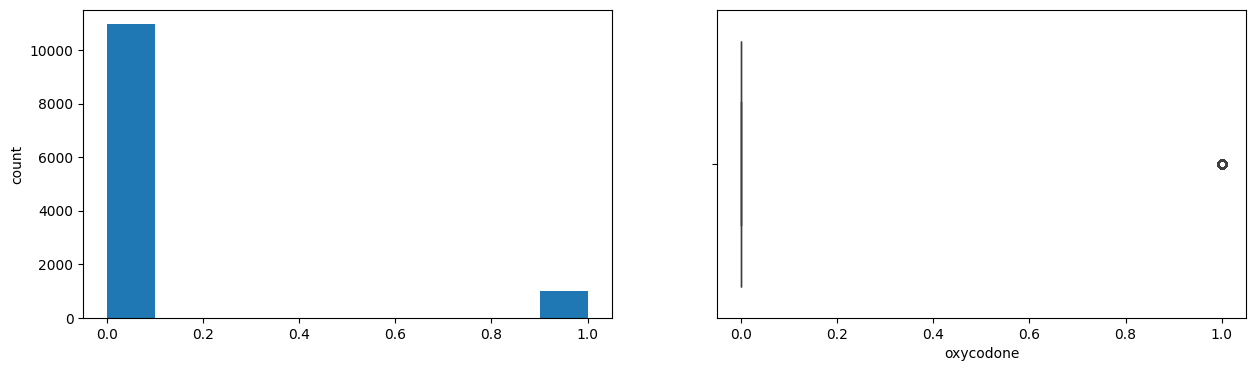

oxymorphone
Skew : 8.43


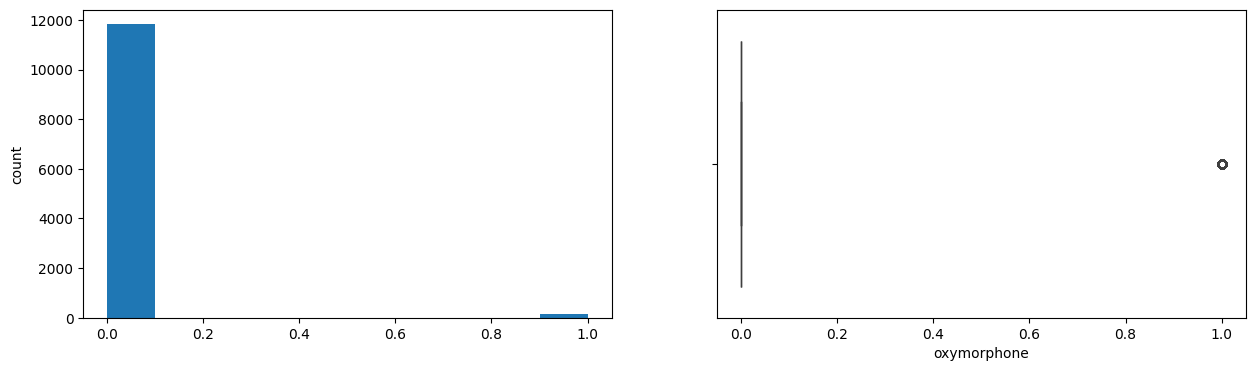

ethanol
Skew : 1.05


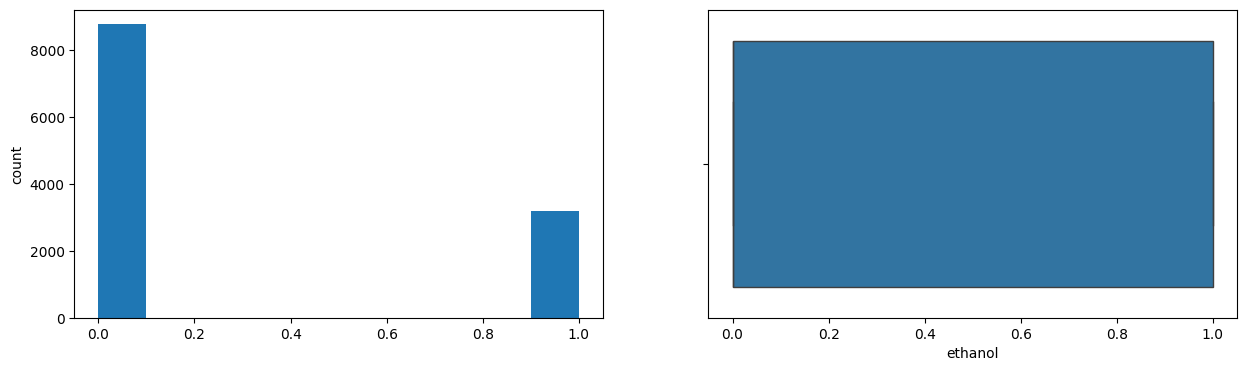

hydrocodone
Skew : 8.24


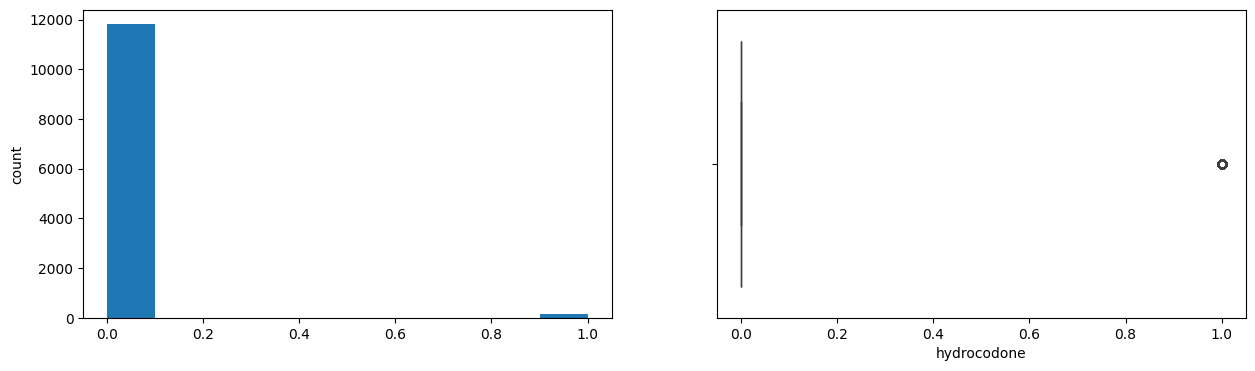

benzodiazepine
Skew : 1.31


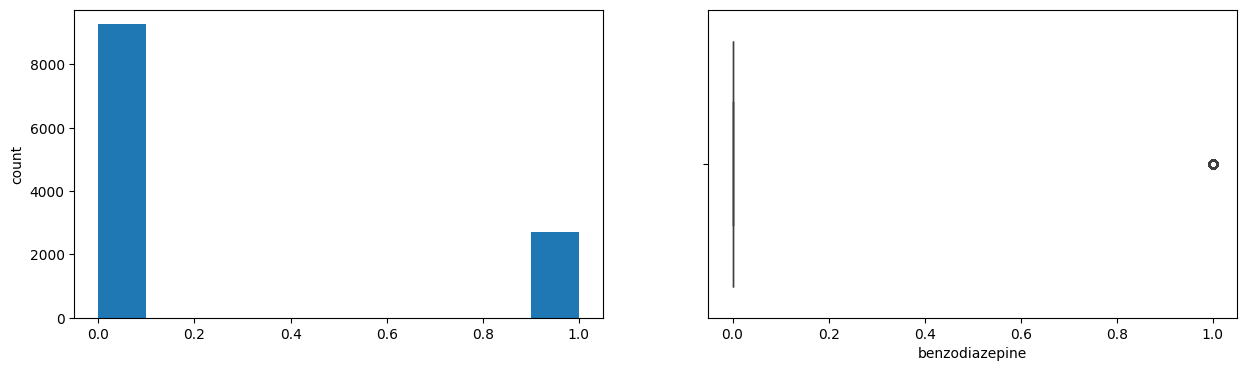

methadone
Skew : 2.87


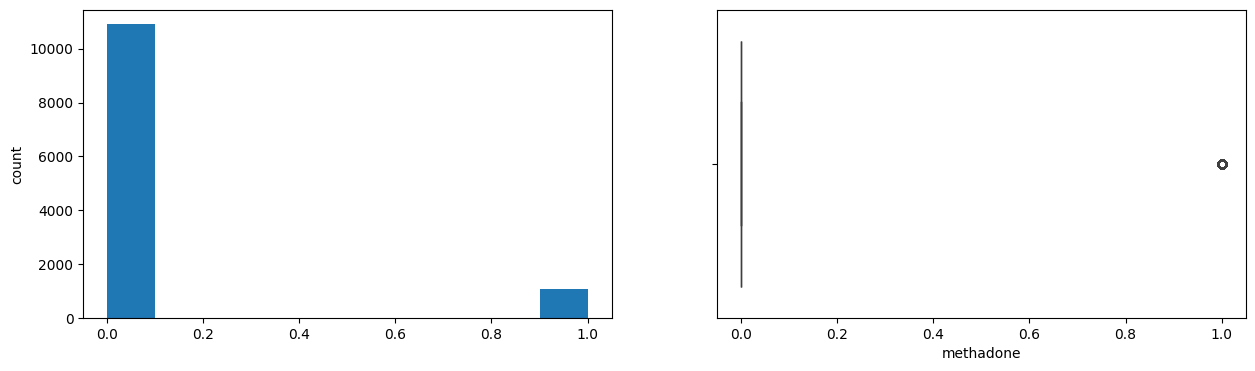

meth_amphetamine
Skew : 9.56


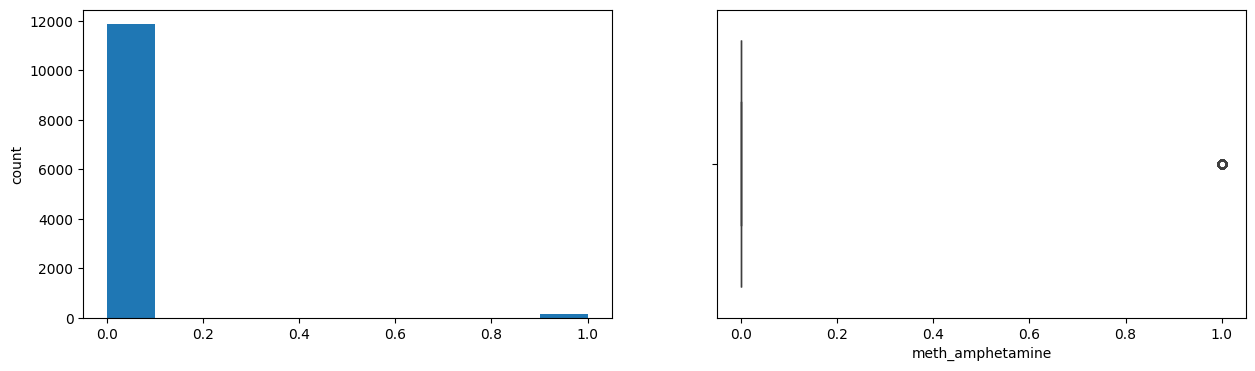

amphet
Skew : 4.98


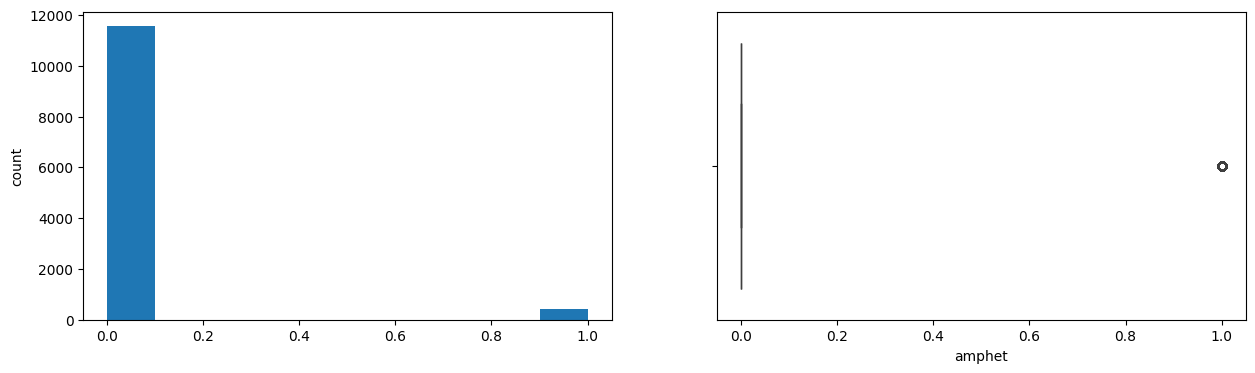

tramad
Skew : 6.06


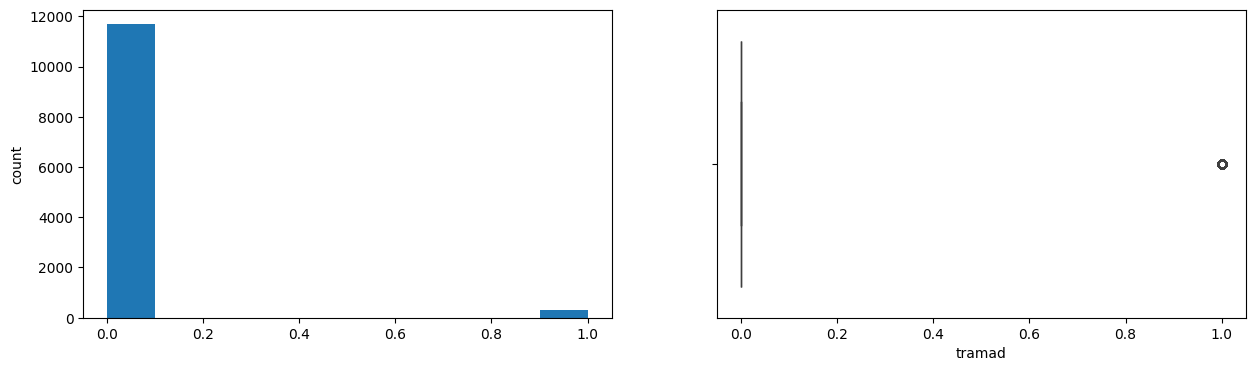

hydromorphone
Skew : 12.35


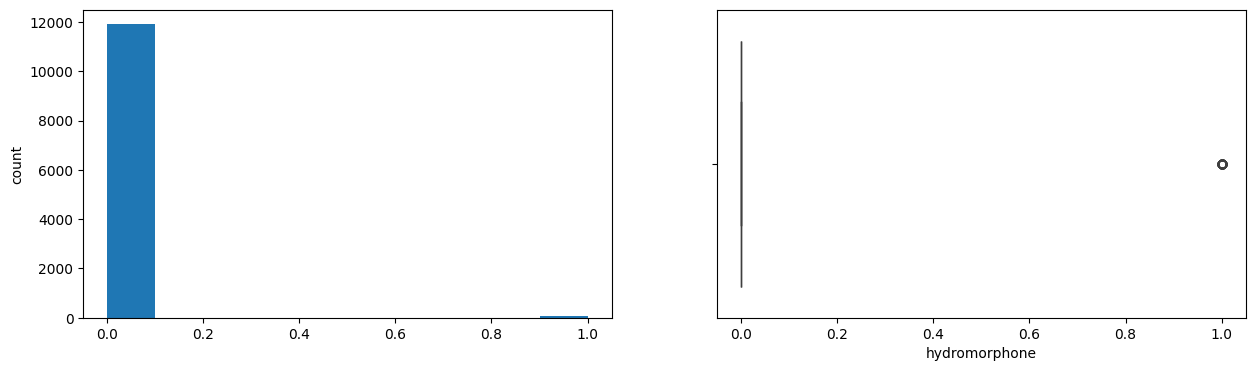

morphine_notheroin
Skew : 14.53


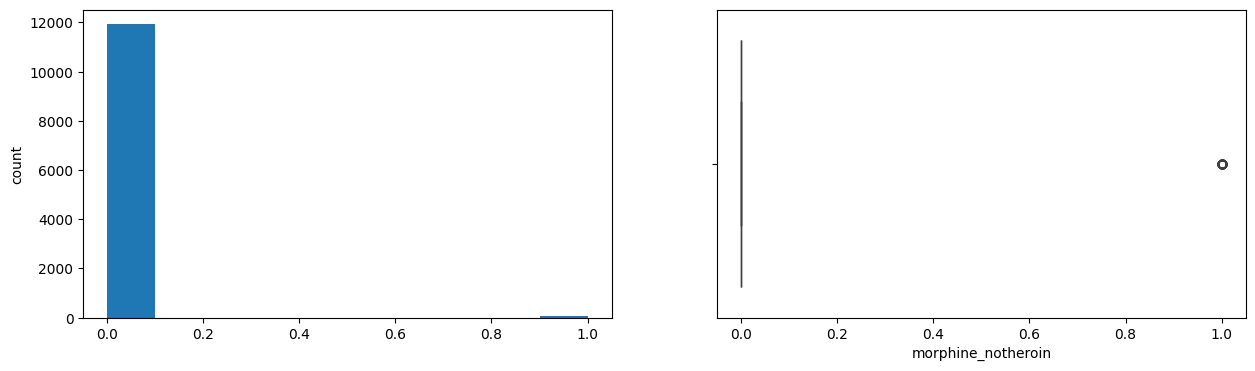

xylazine
Skew : 2.87


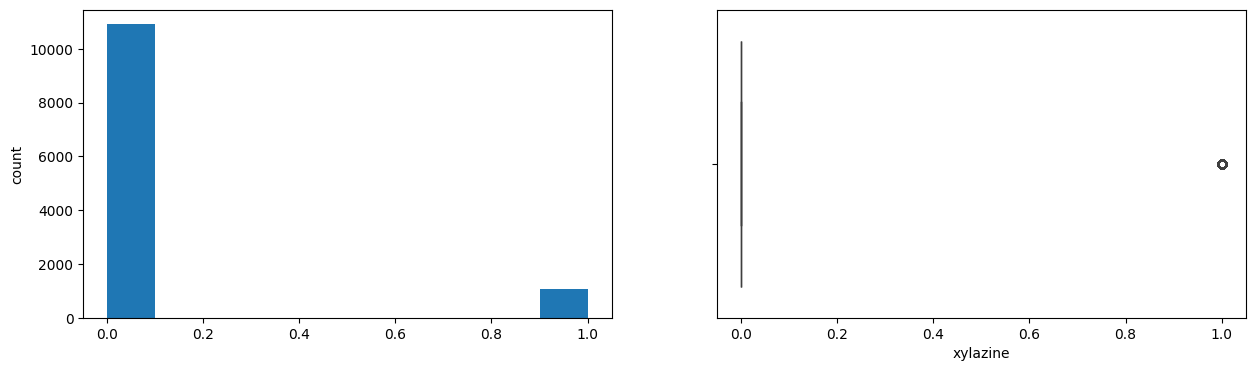

gabapentin
Skew : 4.75


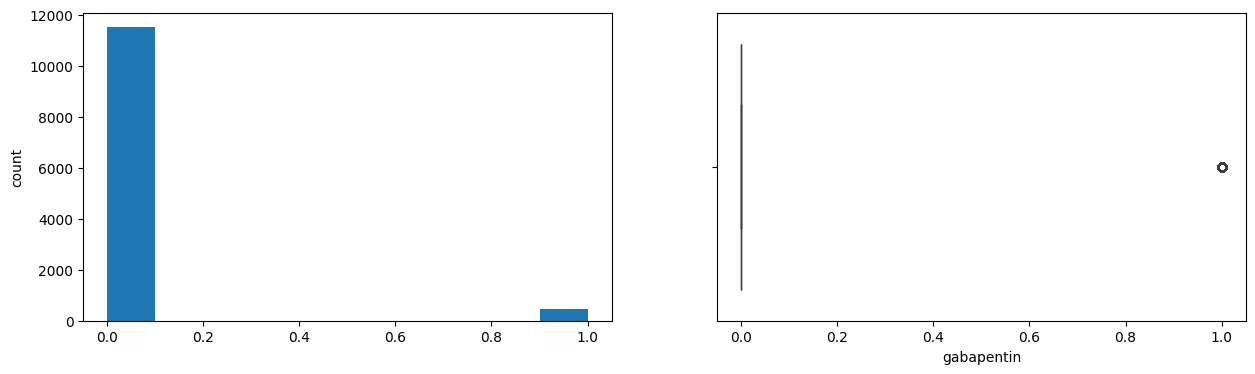

opiatenos
Skew : 9.56


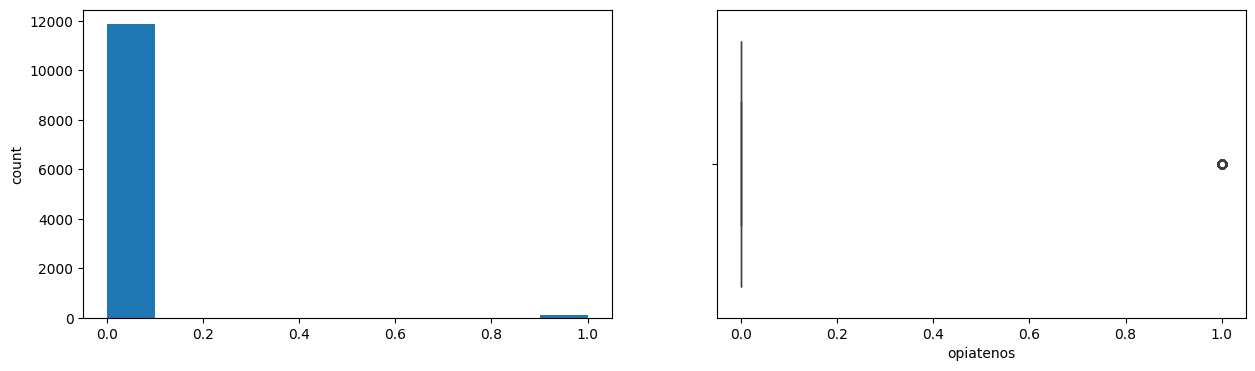

heroin_morph_codeine
Skew : 1.67


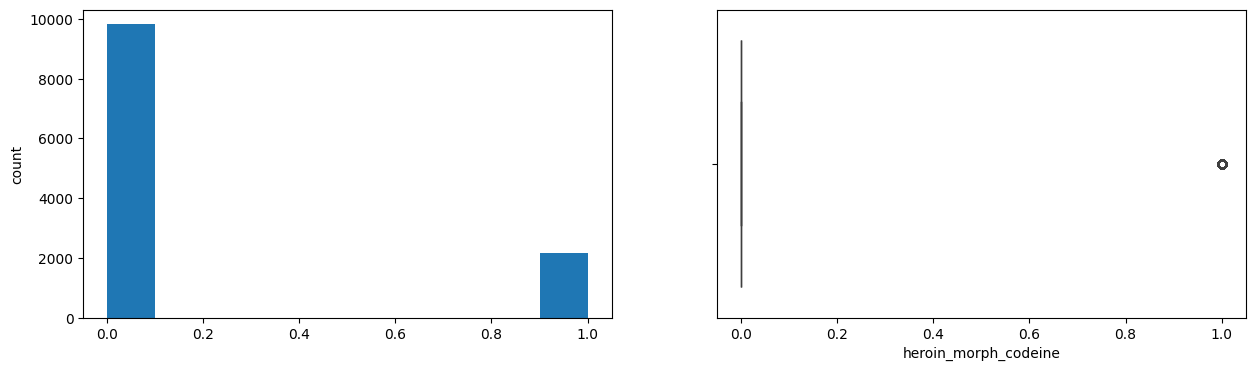

other_opioid
Skew : 11.41


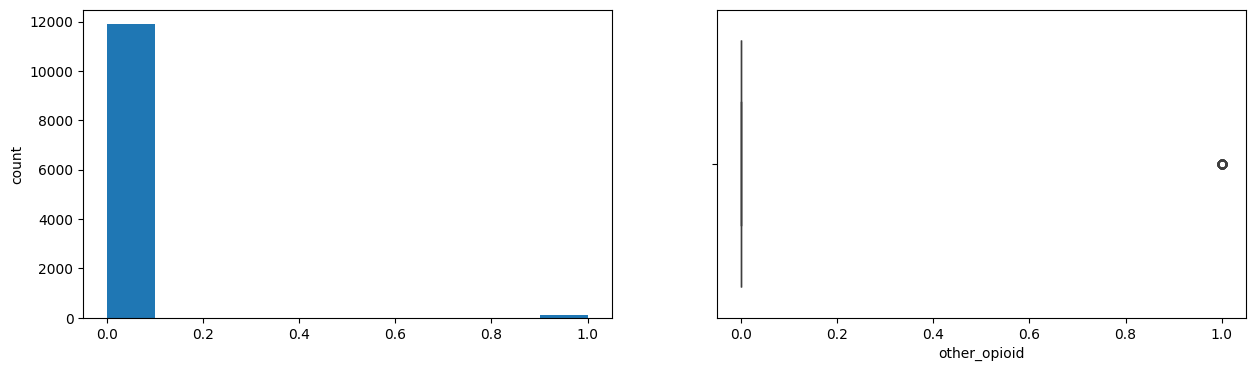

anyopioid
Skew : -1.07


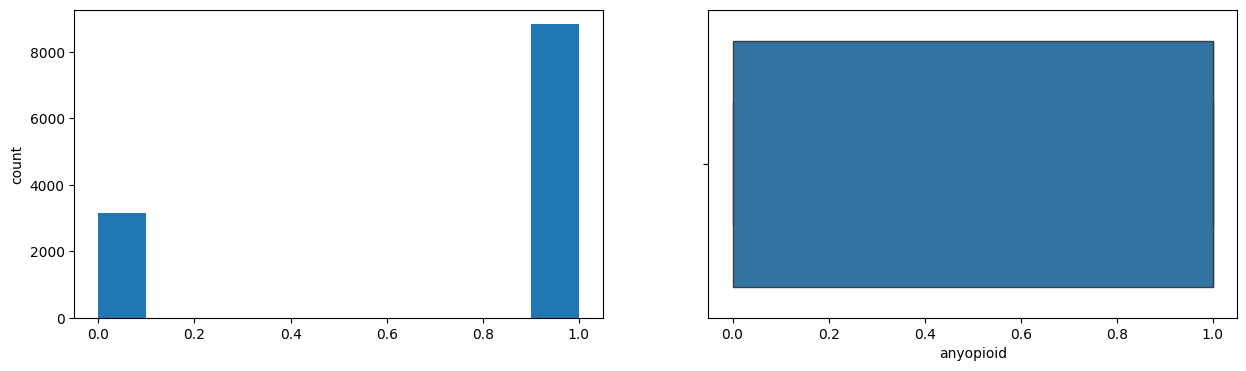

Year
Skew : -0.44


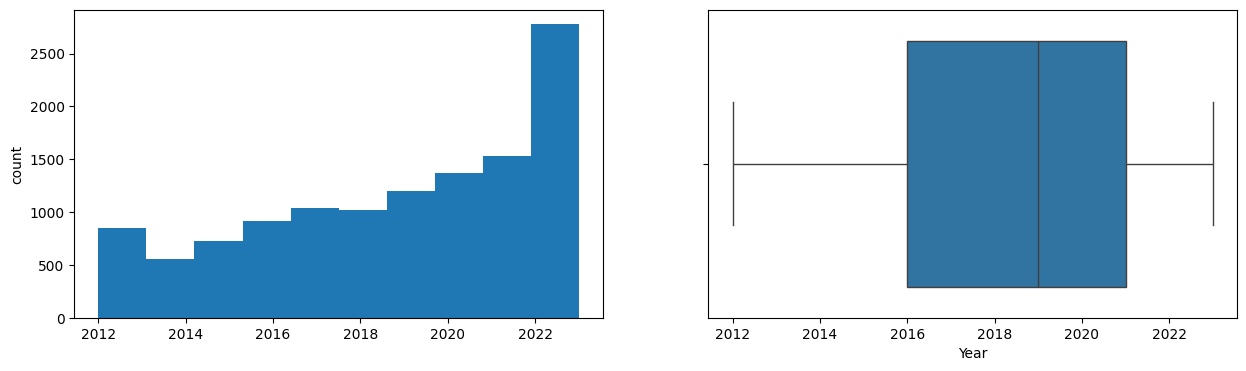

Month
Skew : -0.03


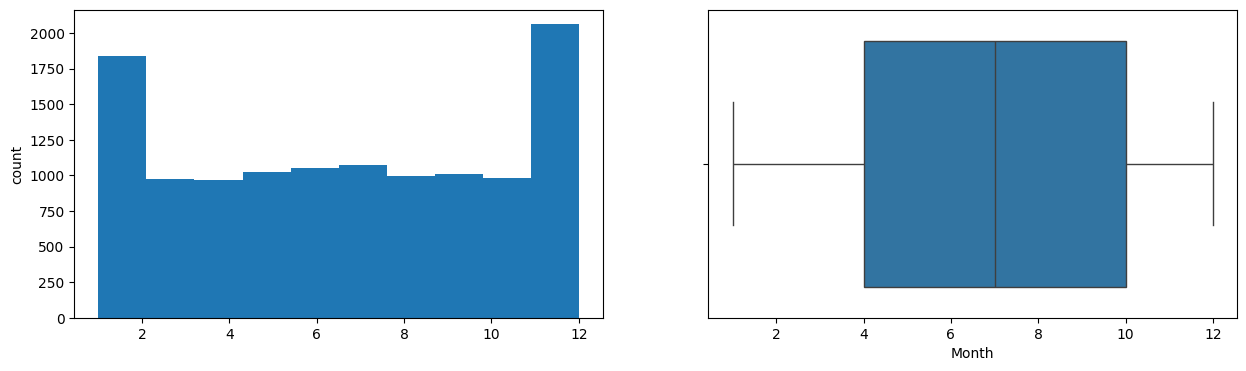

Day
Skew : 0.07


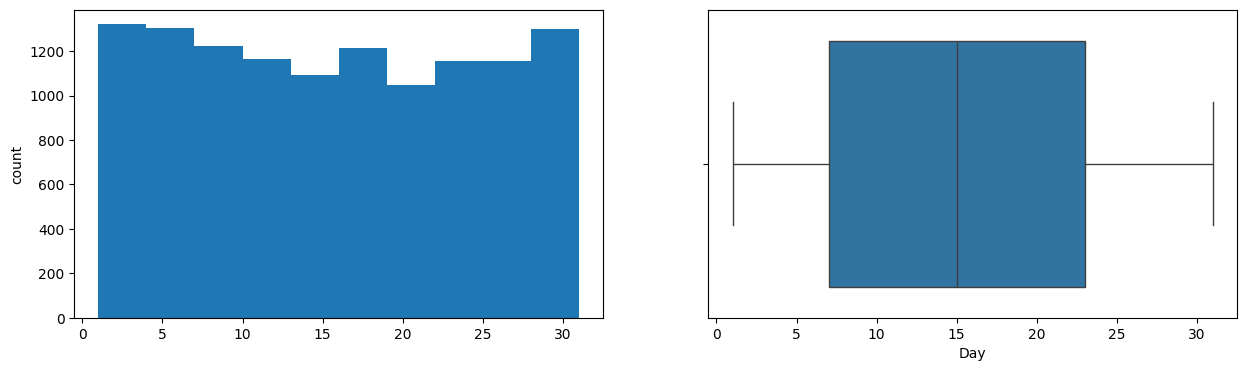

date_id
Skew : -0.44


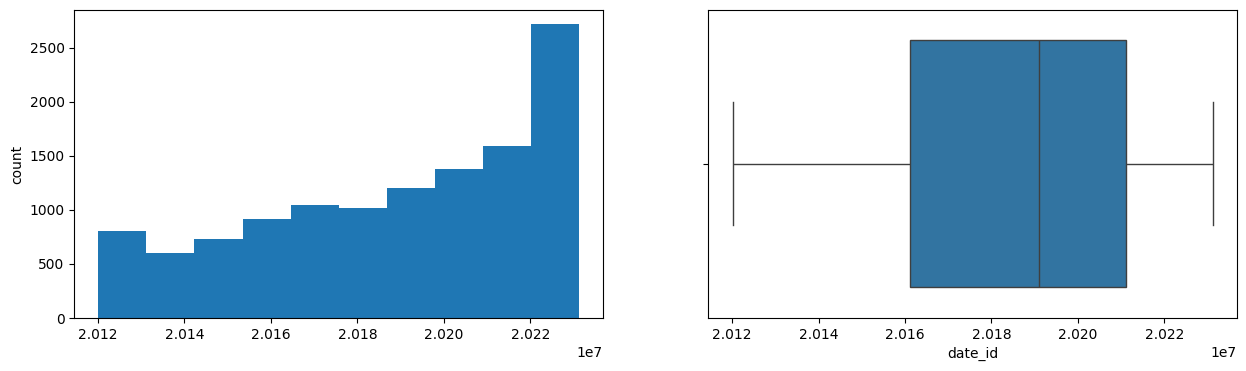

drug_count
Skew : 0.36


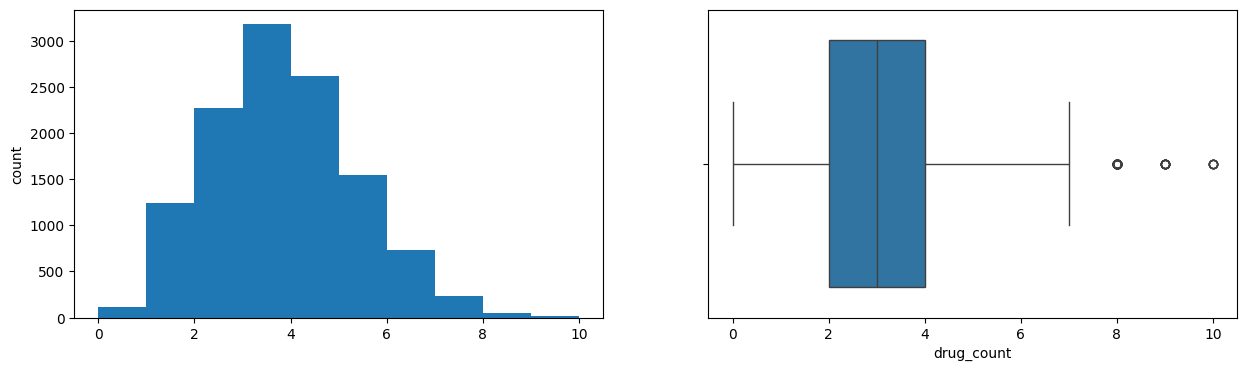

In [34]:
for col in num_cols:
    print(col)
    print('Skew :', round(transform_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    transform_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=transform_df[col])
    plt.show()

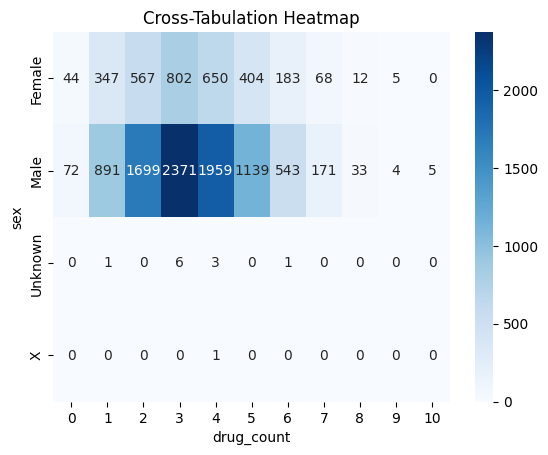

In [35]:
cross_tab = pd.crosstab(transform_df['sex'], transform_df['drug_count'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross-Tabulation Heatmap')
plt.show()

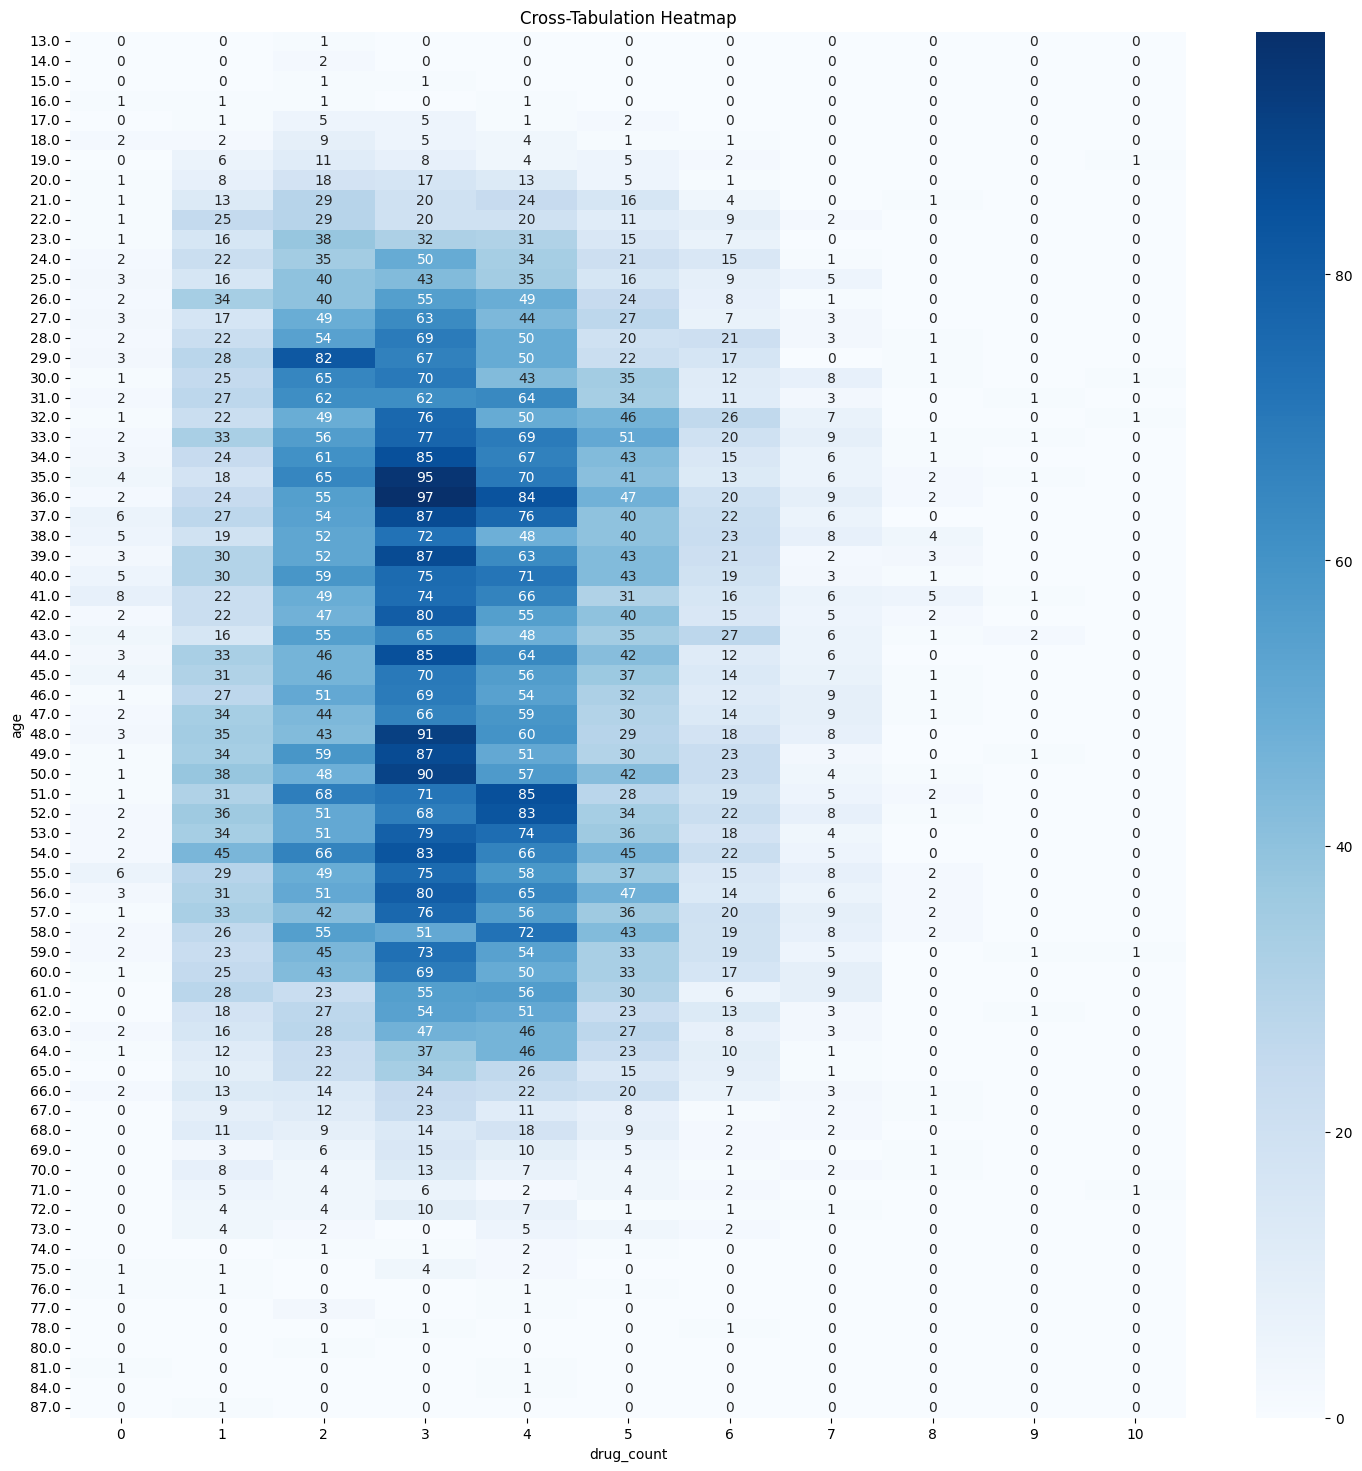

In [36]:
plt.figure(figsize=(18,18))
cross_tab = pd.crosstab(transform_df['age'], transform_df['drug_count'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross-Tabulation Heatmap')
plt.show()

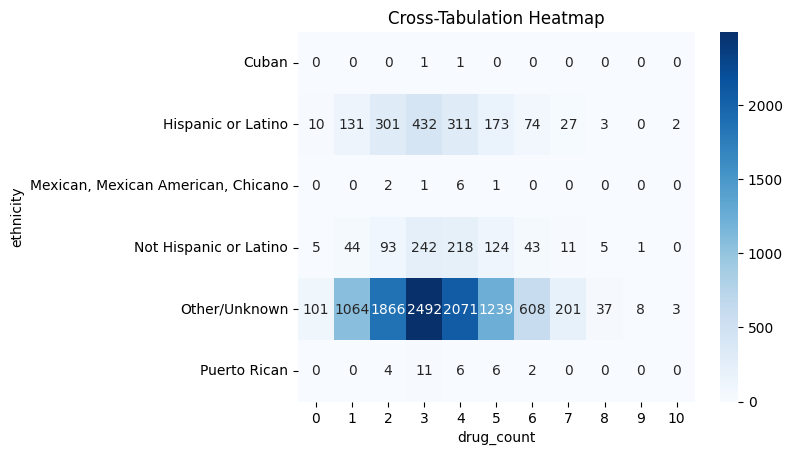

In [37]:
cross_tab = pd.crosstab(transform_df['ethnicity'], transform_df['drug_count'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross-Tabulation Heatmap')
plt.show()

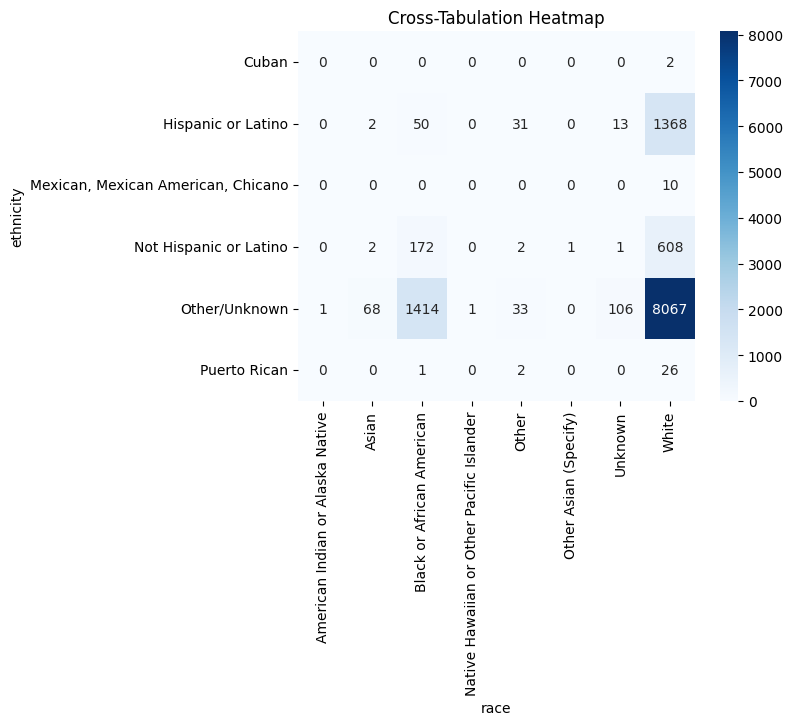

In [38]:
cross_tab = pd.crosstab(transform_df['ethnicity'], transform_df['race'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross-Tabulation Heatmap')
plt.show()

In [39]:
print(transform_df['age'].unique())

[37. 28. 26. 41. 57. 64. 33. 23. 54. 45. 21. 48. 30. 49. 39. 44. 42. 43.
 46. 50. 35. 14. 31. 40. 68. 47. 51. 65. 52. 25. 59. 27. 34. 38. 53. 56.
 24. 36. 22. 63. 70. 60. 29. 32. 55. 61. 67. 19. 58. 66. 62. 20. 18. 69.
 73. 72. 71. 16. 74. 17. 77. nan 84. 75. 80. 81. 15. 78. 87. 76. 13.]


In [40]:
for col in transform_df.columns:
    invalid_values = transform_df[col][transform_df[col] == "Unknown"]
    if not invalid_values.empty:
        print(f"Column '{col}' has invalid values: {invalid_values.unique()}")


Column 'sex' has invalid values: ['Unknown']
Column 'race' has invalid values: ['Unknown']
Column 'residencecity' has invalid values: ['Unknown']
Column 'residencecounty' has invalid values: ['Unknown']
Column 'residencestate' has invalid values: ['Unknown']
Column 'injurycity' has invalid values: ['Unknown']
Column 'injurycounty' has invalid values: ['Unknown']
Column 'injurystate' has invalid values: ['Unknown']
Column 'injuryplace' has invalid values: ['Unknown']
Column 'descriptionofinjury' has invalid values: ['Unknown']
Column 'deathcity' has invalid values: ['Unknown']
Column 'deathcounty' has invalid values: ['Unknown']
Column 'death_state' has invalid values: ['Unknown']
Column 'location' has invalid values: ['Unknown']
Column 'locationifother' has invalid values: ['Unknown']
Column 'mannerofdeath' has invalid values: ['Unknown']
Column 'othersignifican' has invalid values: ['Unknown']
Column 'other' has invalid values: ['Unknown']
Column 'residencecitygeo' has invalid values: